# Algorithmic Trading (Unsupervised Learning)

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader.data as web
from statsmodels.regression.rolling import RollingOLS
import datetime
import yfinance as yf
import sklearn
import pandas_ta
import warnings
warnings.filterwarnings("ignore")

## 1. Gather the Data

In [130]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [131]:
sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')
symbols_list = sp500['Symbol'].unique().tolist()
symbols_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'BXP',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG'

In [132]:
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365*10)

In [133]:
df = yf.download(symbols_list, start=start_date, end=end_date).stack()

[*********************100%%**********************]  503 of 503 completed


In [134]:
df.index.names = ['date', 'ticker']
df.columns = df.columns.str.lower()
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2014-08-13 A        36.038292   39.184547   39.320457   38.762520   38.969955   
           AAL      36.028404   38.119999   38.459999   37.439999   37.639999   
           AAPL     21.610004   24.309999   24.309999   24.010000   24.037500   
           ABBV     35.456131   53.599998   53.639999   52.750000   52.970001   
           ABT      34.823414   42.160000   42.160000   41.830002   41.880001   
...                       ...         ...         ...         ...         ...   
2024-08-09 XYL     128.589996  128.589996  128.820007  126.699997  128.169998   
           YUM     136.789993  136.789993  137.789993  136.440002  137.429993   
           ZBH     108.080002  108.080002  108.550003  107.389999  108.300003   
           ZBRA    319.950012  319.950012  322.980011  315.250000  320.549988   
           ZTS     185.250000  185.250000  189.630005  185.169998  188.369995   

Price                   volume  
date       ticker               
2014-08-13 A         2406377.0  
           AAL       6177000.0  
           AAPL    127664000.0  
           ABBV      9029400.0  
           ABT       3441500.0  
...                        ...  
2024-08-09 XYL        909800.0  
           YUM       1446300.0  
           ZBH       1174700.0  
           ZBRA       271700.0  
           ZTS       1881700.0  

[1230151 rows x 6 columns]

## 2. Calculate Features and Technical Indicators for each stock
* Garman-Klass Volitility
* RSI
* Bollinger Bands
* ATR
* MACD
* Dollar Volume

In [135]:
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)
df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))
df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])

In [136]:
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2014-08-13 A        36.038292   39.184547   39.320457   38.762520   38.969955   
           AAL      36.028404   38.119999   38.459999   37.439999   37.639999   
           AAPL     21.610004   24.309999   24.309999   24.010000   24.037500   
           ABBV     35.456131   53.599998   53.639999   52.750000   52.970001   
           ABT      34.823414   42.160000   42.160000   41.830002   41.880001   
...                       ...         ...         ...         ...         ...   
2024-08-09 XYL     128.589996  128.589996  128.820007  126.699997  128.169998   
           YUM     136.789993  136.789993  137.789993  136.440002  137.429993   
           ZBH     108.080002  108.080002  108.550003  107.389999  108.300003   
           ZBRA    319.950012  319.950012  322.980011  315.250000  320.549988   
           ZTS     185.250000  185.250000  189.630005  185.169998  188.369995   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2014-08-13 A         2406377.0         -0.002261        NaN       NaN   
           AAL       6177000.0         -0.000378        NaN       NaN   
           AAPL    127664000.0         -0.004301        NaN       NaN   
           ABBV      9029400.0         -0.062110        NaN       NaN   
           ABT       3441500.0         -0.013121        NaN       NaN   
...                        ...               ...        ...       ...   
2024-08-09 XYL        909800.0          0.000134  40.570103  4.834413   
           YUM       1446300.0          0.000040  58.690728  4.826175   
           ZBH       1174700.0          0.000056  45.761197  4.675135   
           ZBRA       271700.0          0.000292  49.493377  5.735586   
           ZTS       1881700.0          0.000175  57.807464  5.172892   

Price               bb_high    bb_mid  
date       ticker                      
2014-08-13 A            NaN       NaN  
           AAL          NaN       NaN  
           AAPL         NaN       NaN  
           ABBV         NaN       NaN  
           ABT          NaN       NaN  
...                     ...       ...  
2024-08-09 XYL     4.987310  4.910861  
           YUM     4.941003  4.883589  
           ZBH     4.738203  4.706669  
           ZBRA    5.853891  5.794739  
           ZTS     5.237606  5.205249  

[1230151 rows x 11 columns]

In [137]:
def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'],
                        low=stock_data['low'],
                        close=stock_data['close'],
                        length=14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

In [138]:
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length = 20)
    # Select the MACD line (first column)
    if macd is not None and not macd.empty:
        macd = macd.iloc[:, 0]
        return macd.sub(macd.mean()).div(macd.std())
    else:
        pass
df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)

In [139]:
df['dollar_volume'] = df['adj close']*df['volume']/1e6

In [140]:
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2014-08-13 A        36.038292   39.184547   39.320457   38.762520   38.969955   
           AAL      36.028404   38.119999   38.459999   37.439999   37.639999   
           AAPL     21.610004   24.309999   24.309999   24.010000   24.037500   
           ABBV     35.456131   53.599998   53.639999   52.750000   52.970001   
           ABT      34.823414   42.160000   42.160000   41.830002   41.880001   
...                       ...         ...         ...         ...         ...   
2024-08-09 XYL     128.589996  128.589996  128.820007  126.699997  128.169998   
           YUM     136.789993  136.789993  137.789993  136.440002  137.429993   
           ZBH     108.080002  108.080002  108.550003  107.389999  108.300003   
           ZBRA    319.950012  319.950012  322.980011  315.250000  320.549988   
           ZTS     185.250000  185.250000  189.630005  185.169998  188.369995   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2014-08-13 A         2406377.0         -0.002261        NaN       NaN   
           AAL       6177000.0         -0.000378        NaN       NaN   
           AAPL    127664000.0         -0.004301        NaN       NaN   
           ABBV      9029400.0         -0.062110        NaN       NaN   
           ABT       3441500.0         -0.013121        NaN       NaN   
...                        ...               ...        ...       ...   
2024-08-09 XYL        909800.0          0.000134  40.570103  4.834413   
           YUM       1446300.0          0.000040  58.690728  4.826175   
           ZBH       1174700.0          0.000056  45.761197  4.675135   
           ZBRA       271700.0          0.000292  49.493377  5.735586   
           ZTS       1881700.0          0.000175  57.807464  5.172892   

Price               bb_high    bb_mid       atr      macd  dollar_volume  
date       ticker                                                         
2014-08-13 A            NaN       NaN       NaN       NaN      86.721717  
           AAL          NaN       NaN       NaN       NaN     222.547453  
           AAPL         NaN       NaN       NaN       NaN    2758.819605  
           ABBV         NaN       NaN       NaN       NaN     320.147589  
           ABT          NaN       NaN       NaN       NaN     119.844779  
...                     ...       ...       ...       ...            ...  
2024-08-09 XYL     4.987310  4.910861  1.979570 -1.903029     116.991179  
           YUM     4.941003  4.883589  1.444287  0.905936     197.839367  
           ZBH     4.738203  4.706669 -0.022987 -0.190228     126.961578  
           ZBRA    5.853891  5.794739  1.160423  0.043022      86.930418  
           ZTS     5.237606  5.205249  1.610518  0.971029     348.584925  

[1230151 rows x 14 columns]

## 3. Aggregate on a monthly level and filter the top 150 liquid stocks for each month
To reduce training time and experiment with features and strategies, we convert the daily daity to end of month frequency

In [141]:
last_cols = [c for c in df.columns if c not in ['dollar_volume', 'close', 'high', 'low', 'open', 'volume']]

d1 = df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume')
d2 = df.unstack()[last_cols].resample('M').last().stack('ticker')

data = d1.join(d2).dropna()
data

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2014-09-30 A           91.651801   37.572811         -0.002766  49.953039   
           AAL        335.748824   33.533257          0.000170  40.435758   
           AAPL      6472.232537   22.390051         -0.005359  52.156320   
           ABBV       440.048056   38.207947         -0.068579  55.520750   
           ABT        162.235874   34.352604         -0.014827  38.017841   
...                          ...         ...               ...        ...   
2024-08-31 XYL        166.331695  128.589996          0.000134  40.570103   
           YUM        318.458090  136.789993          0.000040  58.690728   
           ZBH        187.433605  108.080002          0.000056  45.761197   
           ZBRA       153.931485  319.950012          0.000292  49.493377   
           ZTS        454.546536  185.250000          0.000175  57.807464   

                     bb_low   bb_high    bb_mid       atr      macd  
date       ticker                                                    
2014-09-30 A       3.643914  3.681752  3.662833 -1.174921 -0.185839  
           AAL     3.517489  3.651583  3.584536  0.272195 -1.190156  
           AAPL    3.121345  3.176634  3.148989 -0.969000 -0.253888  
           ABBV    3.625561  3.712871  3.669216 -1.228272  0.190063  
           ABT     3.566896  3.616201  3.591549 -1.272577 -0.227679  
...                     ...       ...       ...       ...       ...  
2024-08-31 XYL     4.834413  4.987310  4.910861  1.979570 -1.903029  
           YUM     4.826175  4.941003  4.883589  1.444287  0.905936  
           ZBH     4.675135  4.738203  4.706669 -0.022987 -0.190228  
           ZBRA    5.735586  5.853891  5.794739  1.160423  0.043022  
           ZTS     5.172892  5.237606  5.205249  1.610518  0.971029  

[58691 rows x 9 columns]

### 3.1 Calculate 5 year rolling average of dollar volume for each stock before filtering

In [142]:
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())

data['dollar_vol_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending=False))

data = data[data['dollar_vol_rank']<150].drop(['dollar_volume', 'dollar_vol_rank'], axis=1)

data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2015-08-31 AAL      37.170902         -0.000150  42.889597  3.597218   
           AAPL     25.487453         -0.003185  44.266638  3.204981   
           ABBV     42.565250         -0.064416  36.934471  3.759028   
           ABT      38.183517         -0.012576  37.225565  3.620816   
           ACN      81.099403         -0.009820  37.950971  4.381344   
...                       ...               ...        ...       ...   
2024-08-31 VZ       40.750000          0.000166  52.897166  3.684503   
           WFC      52.759998          0.000075  36.803106  3.945713   
           WMT      67.949997          0.000085  48.608078  4.218256   
           XOM     118.849998          0.000110  57.209575  4.740129   
           ZTS     185.250000          0.000175  57.807464  5.172892   

                    bb_high    bb_mid       atr      macd  
date       ticker                                          
2015-08-31 AAL     3.794971  3.696095  1.465059 -0.783956  
           AAPL    3.352655  3.278818 -0.633737 -0.593873  
           ABBV    3.926416  3.842722 -0.077931 -0.931032  
           ABT     3.839240  3.730028 -0.362838 -1.198604  
           ACN     4.556307  4.468826 -0.692056 -0.612671  
...                     ...       ...       ...       ...  
2024-08-31 VZ      3.765677  3.725090  0.025534 -0.020540  
           WFC     4.169941  4.057827  1.484411 -2.168805  
           WMT     4.288656  4.253456  1.628982 -0.764804  
           XOM     4.792787  4.766458  1.039614  0.512533  
           ZTS     5.237606  5.205249  1.610518  0.971029  

[16241 rows x 8 columns]

## 4. Calculate monthly returns for different time horizons as features
To capture time series dynamics that reflect momentum patterns, we calculate historical returns using the method .pct_change(lag), that is, returns over monthly periods as identified by lags

In [143]:
def compute_returns(df):
    outlier_cutoff = 0.005
    lags = [1,2,3,6,9,12]
    for lag in lags:
        df[f'return_{lag}m'] = (df['adj close'].pct_change(lag).pipe(lambda x: x.clip(lower=outlier_cutoff, upper=1-outlier_cutoff))).add(1).pow(1/lag).sub(1)
    return df

data = data.groupby(level=1, group_keys=False).apply(compute_returns).dropna()

data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2016-08-31 AAL      34.989555         -0.000479  56.204435  3.511263   
           AAPL     24.494835         -0.002162  55.384889  3.235305   
           ABBV     45.408329         -0.046259  44.920185  3.835019   
           ABT      36.298470         -0.010390  41.307092  3.624830   
           ACN     100.967102         -0.006450  52.918856  4.598803   
...                       ...               ...        ...       ...   
2024-08-31 VRTX    468.450012          0.000102  44.028052  6.145373   
           VZ       40.750000          0.000166  52.897166  3.684503   
           WFC      52.759998          0.000075  36.803106  3.945713   
           WMT      67.949997          0.000085  48.608078  4.218256   
           XOM     118.849998          0.000110  57.209575  4.740129   

                    bb_high    bb_mid       atr      macd  return_1m  \
date       ticker                                                      
2016-08-31 AAL     3.624501  3.567882 -0.172165  0.863852   0.025595   
           AAPL    3.275645  3.255475 -1.093830 -0.134765   0.023652   
           ABBV    3.899057  3.867038 -1.359900 -0.285310   0.005000   
           ABT     3.710207  3.667518 -0.978283 -0.265248   0.005000   
           ACN     4.631977  4.615390 -1.032739 -0.113661   0.019413   
...                     ...       ...       ...       ...        ...   
2024-08-31 VRTX    6.238941  6.192157  2.416067 -0.737151   0.005000   
           VZ      3.765677  3.725090  0.025534 -0.020540   0.005676   
           WFC     4.169941  4.057827  1.484411 -2.168805   0.005000   
           WMT     4.288656  4.253456  1.628982 -0.764804   0.005000   
           XOM     4.792787  4.766458  1.039614  0.512533   0.005000   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2016-08-31 AAL      0.134050   0.044943   0.000832   0.000554    0.000416  
           AAPL     0.056335   0.022249   0.017543   0.000554    0.000416  
           ABBV     0.021990   0.009095   0.030202   0.014118    0.005403  
           ABT      0.037075   0.021801   0.015706   0.000554    0.000416  
           ACN      0.007519   0.001664   0.024773   0.008896    0.018428  
...                      ...        ...        ...        ...         ...  
2024-08-31 VRTX     0.002497   0.009507   0.018064   0.031353    0.024995  
           VZ       0.002497   0.002157   0.008431   0.012324    0.018742  
           WFC      0.002497   0.001664   0.000832   0.021175    0.023126  
           WMT      0.002497   0.010980   0.026122   0.031609    0.019912  
           XOM      0.016071   0.004500   0.023023   0.018276    0.007786  

[13940 rows x 14 columns]

## 5. Download Fama-French Factors and Calculate Rolling Factors Beta
* We introduce Fama-French Factors (FFF) to estimate the exposure of assets to common ris factors using linear regression
* FFF: 
    - Market risk
    - size
    - value 
    - operating profitability
    - investment
* We can access the historical factor returns using the pandas-datareader and estimate historical exposures using the RollingOLS rolling linear regression.

In [144]:
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
                               'famafrench',
                               start='2010')[0].drop('RF', axis=1)
factor_data.index = factor_data.index.to_timestamp()
factor_data = factor_data.resample('M').last().div(100)
factor_data.index.name = 'date'
factor_data = factor_data.join(data['return_1m']).sort_index()
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2016-08-31 AAL     0.0049  0.0168  0.0318 -0.0185 -0.0034   0.025595
           AAPL    0.0049  0.0168  0.0318 -0.0185 -0.0034   0.023652
           ABBV    0.0049  0.0168  0.0318 -0.0185 -0.0034   0.005000
           ABT     0.0049  0.0168  0.0318 -0.0185 -0.0034   0.005000
           ACN     0.0049  0.0168  0.0318 -0.0185 -0.0034   0.019413
...                   ...     ...     ...     ...     ...        ...
2024-06-30 VRTX    0.0278 -0.0433 -0.0331  0.0049 -0.0182   0.029385
           VZ      0.0278 -0.0433 -0.0331  0.0049 -0.0182   0.005000
           WFC     0.0278 -0.0433 -0.0331  0.0049 -0.0182   0.005000
           WMT     0.0278 -0.0433 -0.0331  0.0049 -0.0182   0.029653
           XOM     0.0278 -0.0433 -0.0331  0.0049 -0.0182   0.005000

[13656 rows x 6 columns]

In [145]:
observations = factor_data.groupby(level=1).size()
valid_stocks = observations[observations>10]

factor_data = factor_data.loc[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2016-08-31 AAL     0.0049  0.0168  0.0318 -0.0185 -0.0034   0.025595
           AAPL    0.0049  0.0168  0.0318 -0.0185 -0.0034   0.023652
           ABBV    0.0049  0.0168  0.0318 -0.0185 -0.0034   0.005000
           ABT     0.0049  0.0168  0.0318 -0.0185 -0.0034   0.005000
           ACN     0.0049  0.0168  0.0318 -0.0185 -0.0034   0.019413
...                   ...     ...     ...     ...     ...        ...
2024-06-30 VRTX    0.0278 -0.0433 -0.0331  0.0049 -0.0182   0.029385
           VZ      0.0278 -0.0433 -0.0331  0.0049 -0.0182   0.005000
           WFC     0.0278 -0.0433 -0.0331  0.0049 -0.0182   0.005000
           WMT     0.0278 -0.0433 -0.0331  0.0049 -0.0182   0.029653
           XOM     0.0278 -0.0433 -0.0331  0.0049 -0.0182   0.005000

[13623 rows x 6 columns]

### 5.1 Rolling Factor Betas

In [146]:
betas = factor_data.groupby(level=1, group_keys=False).apply(lambda x: RollingOLS(endog=x['return_1m'],
                                                                          exog=sm.add_constant(x.drop('return_1m', axis=1)),
                                                                          window=min(24,x.shape[0]),
                                                                          min_nobs=len(x.columns)+1).fit(params_only=True).params.drop('const', axis=1))
betas

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2016-08-31 AAL          NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2024-06-30 VRTX    0.221878  0.870009 -0.734932  0.556794  0.628738
           VZ      0.261887 -0.910103  0.694556 -0.377077 -0.564853
           WFC     0.731040  0.302838  0.167525 -0.359242  0.185001
           WMT     0.360281  0.170361 -0.154266  0.703439  0.103502
           XOM     0.446902  0.068288  0.509234  0.632495  0.087701

[13623 rows x 5 columns]

In [147]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
data = (data.join(betas.groupby('ticker').shift()))
data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))
data = data.drop('adj close', axis=1)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 13707 entries, (Timestamp('2016-08-31 00:00:00'), 'AAL') to (Timestamp('2024-08-31 00:00:00'), 'XOM')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   garman_klass_vol  13707 non-null  float64
 1   rsi               13707 non-null  float64
 2   bb_low            13707 non-null  float64
 3   bb_high           13707 non-null  float64
 4   bb_mid            13707 non-null  float64
 5   atr               13707 non-null  float64
 6   macd              13707 non-null  float64
 7   return_1m         13707 non-null  float64
 8   return_2m         13707 non-null  float64
 9   return_3m         13707 non-null  float64
 10  return_6m         13707 non-null  float64
 11  return_9m         13707 non-null  float64
 12  return_12m        13707 non-null  float64
 13  Mkt-RF            13707 non-null  float64
 14  SMB               13707 non-null  float64
 15  HML        

In [148]:
data

garman_klass_vol        rsi    bb_low   bb_high    bb_mid  \
date       ticker                                                              
2016-08-31 AAL            -0.000479  56.204435  3.511263  3.624501  3.567882   
           AAPL           -0.002162  55.384889  3.235305  3.275645  3.255475   
           ABBV           -0.046259  44.920185  3.835019  3.899057  3.867038   
           ABT            -0.010390  41.307092  3.624830  3.710207  3.667518   
           ACN            -0.006450  52.918856  4.598803  4.631977  4.615390   
...                             ...        ...       ...       ...       ...   
2024-08-31 VRTX            0.000102  44.028052  6.145373  6.238941  6.192157   
           VZ              0.000166  52.897166  3.684503  3.765677  3.725090   
           WFC             0.000075  36.803106  3.945713  4.169941  4.057827   
           WMT             0.000085  48.608078  4.218256  4.288656  4.253456   
           XOM             0.000110  57.209575  4.740129  4.792787  4.766458   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2016-08-31 AAL    -0.172165  0.863852   0.025595   0.134050   0.044943   
           AAPL   -1.093830 -0.134765   0.023652   0.056335   0.022249   
           ABBV   -1.359900 -0.285310   0.005000   0.021990   0.009095   
           ABT    -0.978283 -0.265248   0.005000   0.037075   0.021801   
           ACN    -1.032739 -0.113661   0.019413   0.007519   0.001664   
...                     ...       ...        ...        ...        ...   
2024-08-31 VRTX    2.416067 -0.737151   0.005000   0.002497   0.009507   
           VZ      0.025534 -0.020540   0.005676   0.002497   0.002157   
           WFC     1.484411 -2.168805   0.005000   0.002497   0.001664   
           WMT     1.628982 -0.764804   0.005000   0.002497   0.010980   
           XOM     1.039614  0.512533   0.005000   0.016071   0.004500   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2016-08-31 AAL      0.000832   0.000554    0.000416  0.504199  0.861940   
           AAPL     0.017543   0.000554    0.000416  0.544993  0.091575   
           ABBV     0.030202   0.014118    0.005403  0.413710  0.186122   
           ABT      0.015706   0.000554    0.000416  0.454813 -0.112727   
           ACN      0.024773   0.008896    0.018428  0.549214 -0.052998   
...                      ...        ...         ...       ...       ...   
2024-08-31 VRTX     0.018064   0.031353    0.024995  0.407114 -0.009510   
           VZ       0.008431   0.012324    0.018742  0.201917 -0.186892   
           WFC      0.000832   0.021175    0.023126  0.546949  0.018296   
           WMT      0.026122   0.031609    0.019912  0.379299 -0.223547   
           XOM      0.023023   0.018276    0.007786  0.480997  0.185748   

                        HML       RMW       CMA  
date       ticker                                
2016-08-31 AAL     0.003156  0.386459  0.383636  
           AAPL   -0.415479  0.302728 -0.322920  
           ABBV    0.110072 -0.424425  0.326197  
           ABT    -0.294888  0.108544  0.612319  
           ACN    -0.192252  0.134264  0.044842  
...                     ...       ...       ...  
2024-08-31 VRTX   -0.577906 -0.240483  0.580008  
           VZ      0.104875  0.188211  0.299338  
           WFC     0.566605 -0.547626 -0.142949  
           WMT    -0.032361  0.449348  0.108640  
           XOM     0.292428 -0.254029  0.221952  

[13707 rows x 18 columns]

## 6. For each month, fit a K-Means Clustering Algorithm to group similar assets based on their features

K-means
* We will intitialize the pre-defined centroids for each cluster
* We will visualize these clusters using k-means++
* We will then predefine the centroids

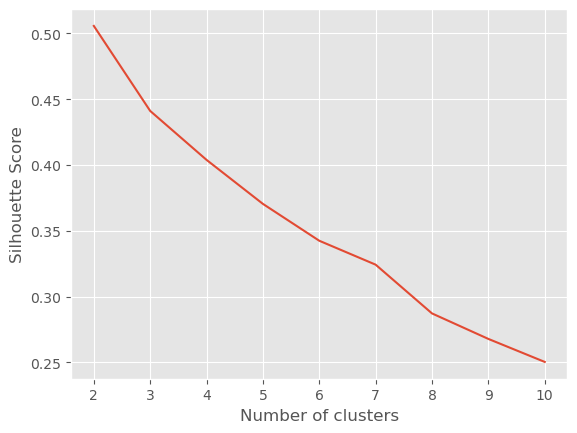

In [149]:
# Check the ideal number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = data.drop('return_1m', axis=1)
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))

plt.plot(range(2, kmax+1), sil)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [150]:
# Defining init centroids after exploring the cluster charts
target_rsi = [45,55,75]
init_centroids = np.zeros((len(target_rsi), 18))
init_centroids[:,1] = target_rsi
init_centroids

array([[ 0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 75.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [151]:
def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=3, random_state=0, init=init_centroids).fit(df).labels_

    return df

data = data.groupby('date', group_keys=False).apply(get_clusters)

data

garman_klass_vol        rsi    bb_low   bb_high    bb_mid  \
date       ticker                                                              
2016-08-31 AAL            -0.000479  56.204435  3.511263  3.624501  3.567882   
           AAPL           -0.002162  55.384889  3.235305  3.275645  3.255475   
           ABBV           -0.046259  44.920185  3.835019  3.899057  3.867038   
           ABT            -0.010390  41.307092  3.624830  3.710207  3.667518   
           ACN            -0.006450  52.918856  4.598803  4.631977  4.615390   
...                             ...        ...       ...       ...       ...   
2024-08-31 VRTX            0.000102  44.028052  6.145373  6.238941  6.192157   
           VZ              0.000166  52.897166  3.684503  3.765677  3.725090   
           WFC             0.000075  36.803106  3.945713  4.169941  4.057827   
           WMT             0.000085  48.608078  4.218256  4.288656  4.253456   
           XOM             0.000110  57.209575  4.740129  4.792787  4.766458   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2016-08-31 AAL    -0.172165  0.863852   0.025595   0.134050   0.044943   
           AAPL   -1.093830 -0.134765   0.023652   0.056335   0.022249   
           ABBV   -1.359900 -0.285310   0.005000   0.021990   0.009095   
           ABT    -0.978283 -0.265248   0.005000   0.037075   0.021801   
           ACN    -1.032739 -0.113661   0.019413   0.007519   0.001664   
...                     ...       ...        ...        ...        ...   
2024-08-31 VRTX    2.416067 -0.737151   0.005000   0.002497   0.009507   
           VZ      0.025534 -0.020540   0.005676   0.002497   0.002157   
           WFC     1.484411 -2.168805   0.005000   0.002497   0.001664   
           WMT     1.628982 -0.764804   0.005000   0.002497   0.010980   
           XOM     1.039614  0.512533   0.005000   0.016071   0.004500   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2016-08-31 AAL      0.000832   0.000554    0.000416  0.504199  0.861940   
           AAPL     0.017543   0.000554    0.000416  0.544993  0.091575   
           ABBV     0.030202   0.014118    0.005403  0.413710  0.186122   
           ABT      0.015706   0.000554    0.000416  0.454813 -0.112727   
           ACN      0.024773   0.008896    0.018428  0.549214 -0.052998   
...                      ...        ...         ...       ...       ...   
2024-08-31 VRTX     0.018064   0.031353    0.024995  0.407114 -0.009510   
           VZ       0.008431   0.012324    0.018742  0.201917 -0.186892   
           WFC      0.000832   0.021175    0.023126  0.546949  0.018296   
           WMT      0.026122   0.031609    0.019912  0.379299 -0.223547   
           XOM      0.023023   0.018276    0.007786  0.480997  0.185748   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2016-08-31 AAL     0.003156  0.386459  0.383636        1  
           AAPL   -0.415479  0.302728 -0.322920        1  
           ABBV    0.110072 -0.424425  0.326197        0  
           ABT    -0.294888  0.108544  0.612319        0  
           ACN    -0.192252  0.134264  0.044842        1  
...                     ...       ...       ...      ...  
2024-08-31 VRTX   -0.577906 -0.240483  0.580008        0  
           VZ      0.104875  0.188211  0.299338        1  
           WFC     0.566605 -0.547626 -0.142949        0  
           WMT    -0.032361  0.449348  0.108640        1  
           XOM     0.292428 -0.254029  0.221952        1  

[13707 rows x 19 columns]

In [152]:
def plot_clusters(data):
    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]

    # clustering on the basis of RSI

    plt.scatter(cluster_0.iloc[:, 0], cluster_0.iloc[:, 1], color='red', label='Cluster 0')
    plt.scatter(cluster_1.iloc[:, 0], cluster_1.iloc[:, 1], color='blue', label='Cluster 1')
    plt.scatter(cluster_2.iloc[:, 0], cluster_2.iloc[:, 1], color='green', label='Cluster 2')

    plt.legend()
    plt.show()
    return

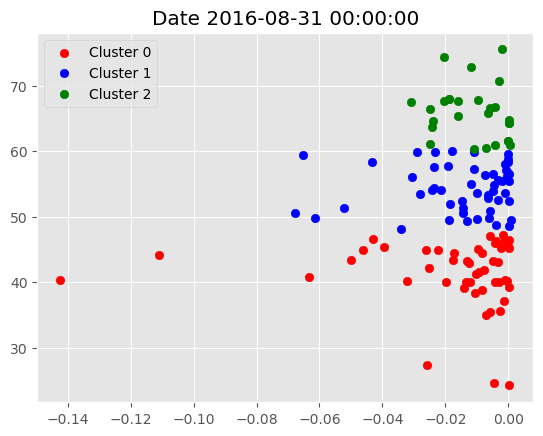

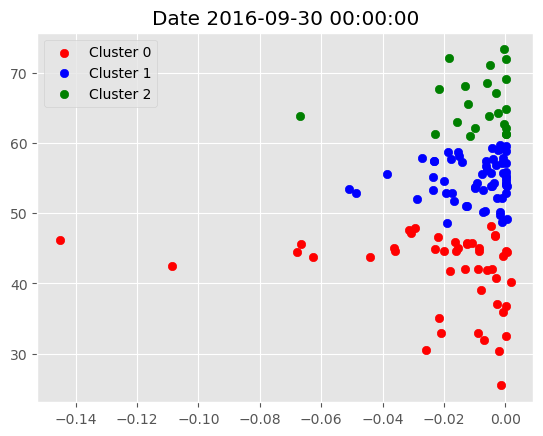

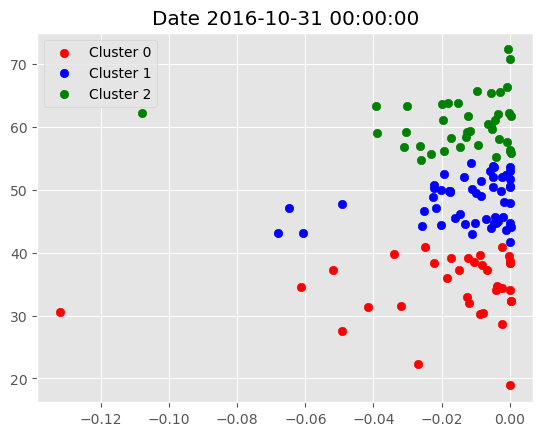

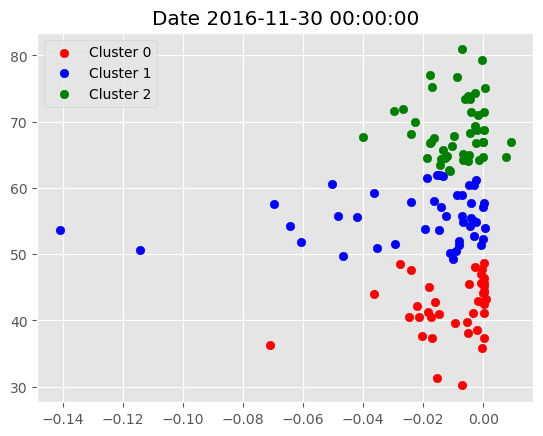

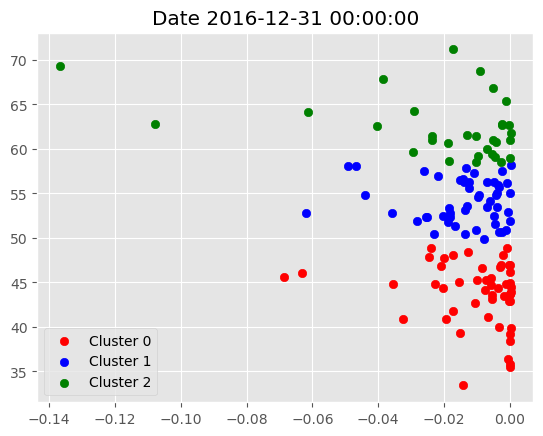

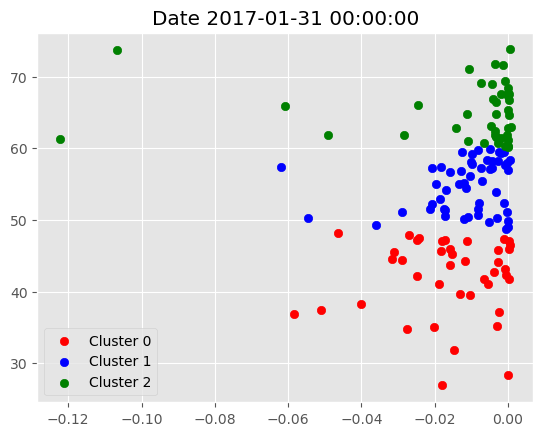

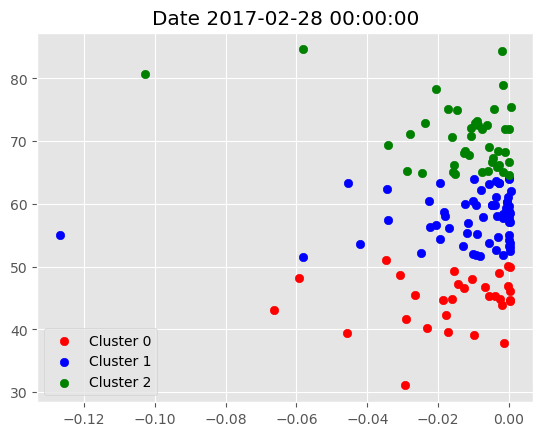

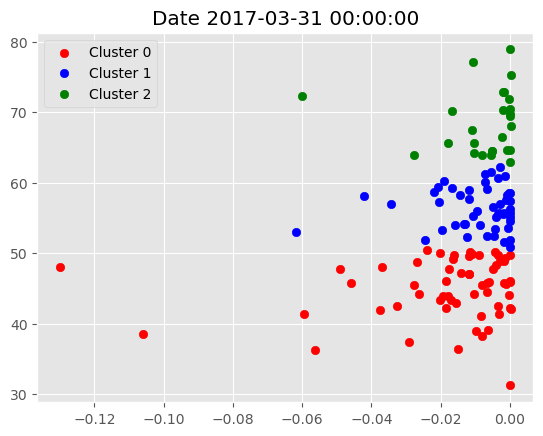

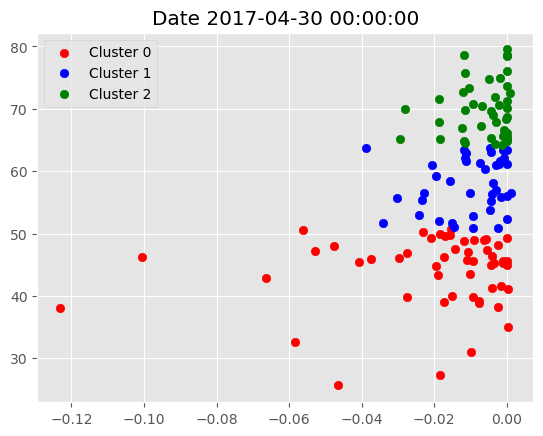

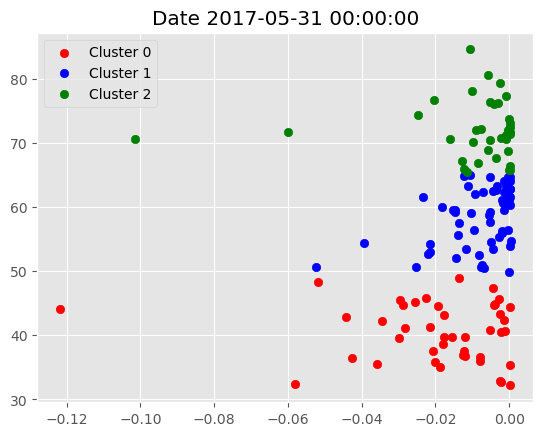

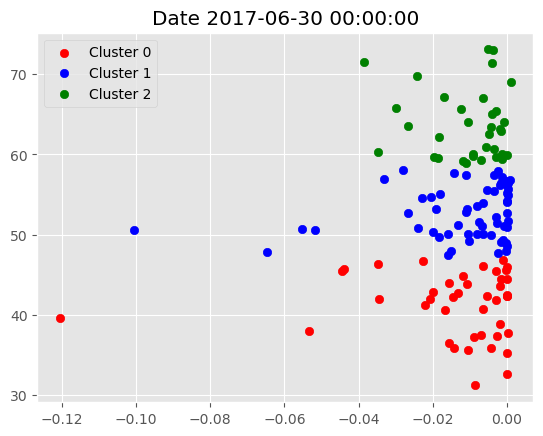

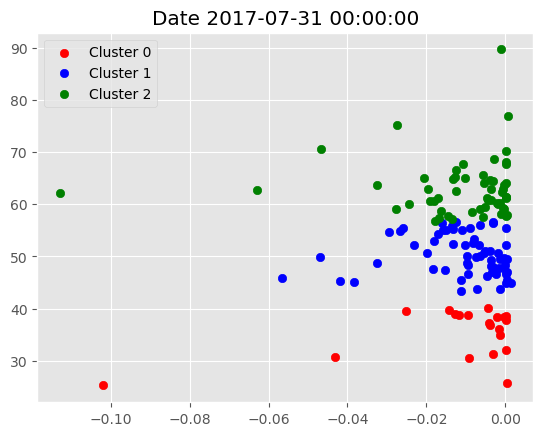

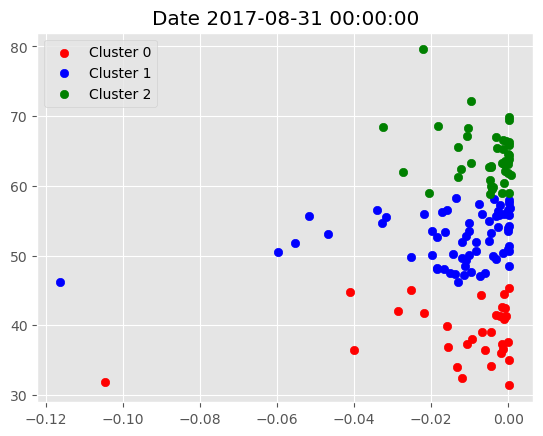

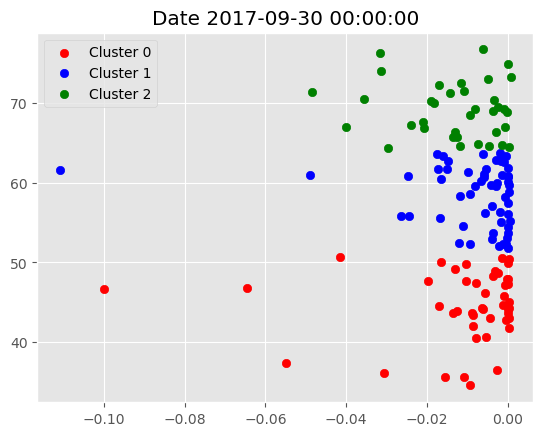

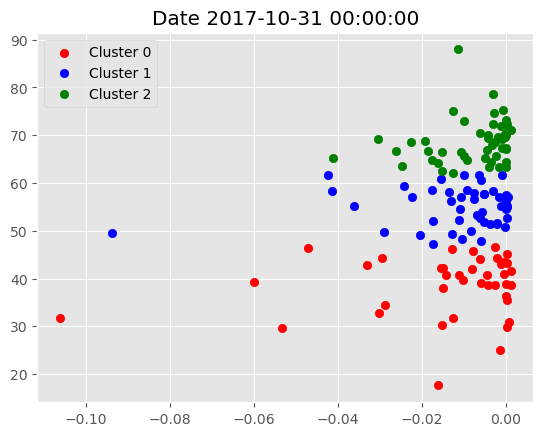

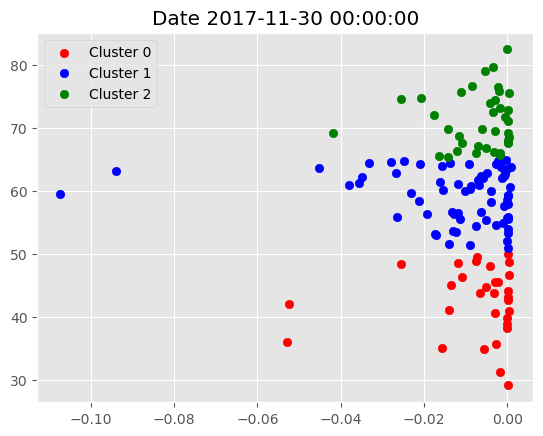

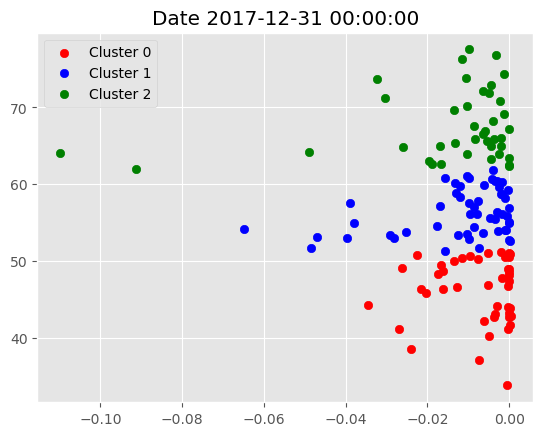

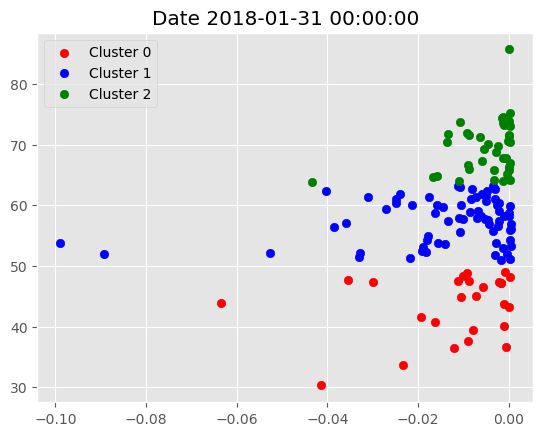

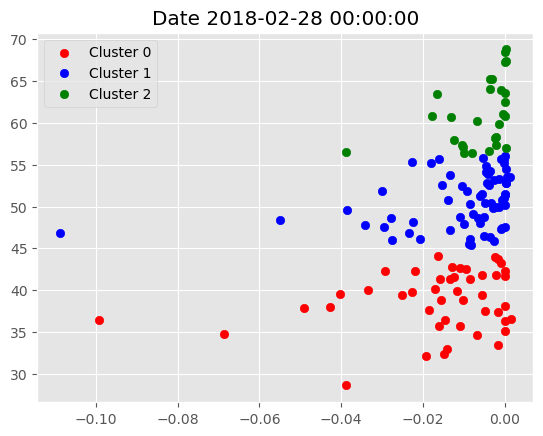

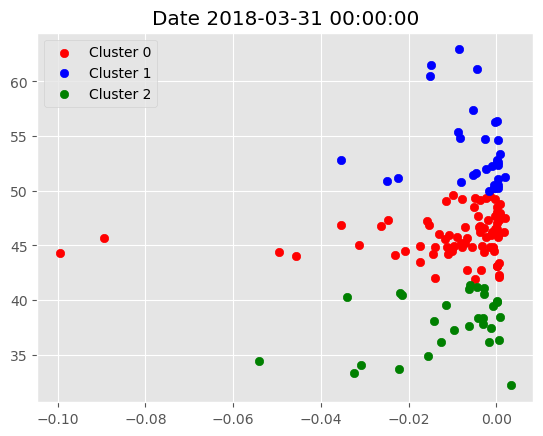

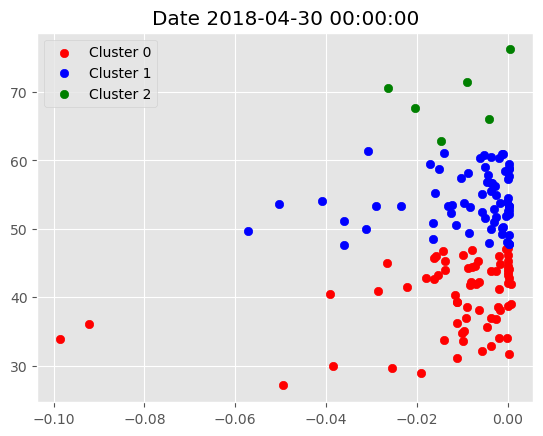

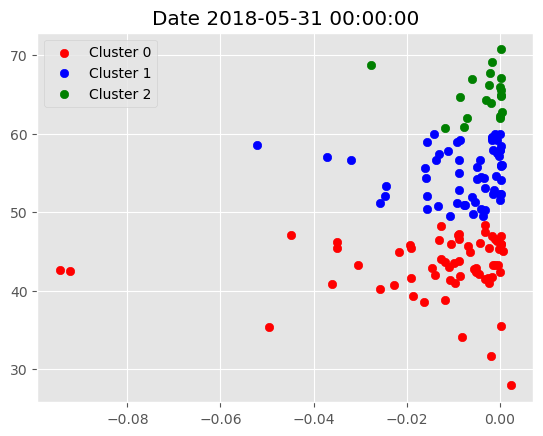

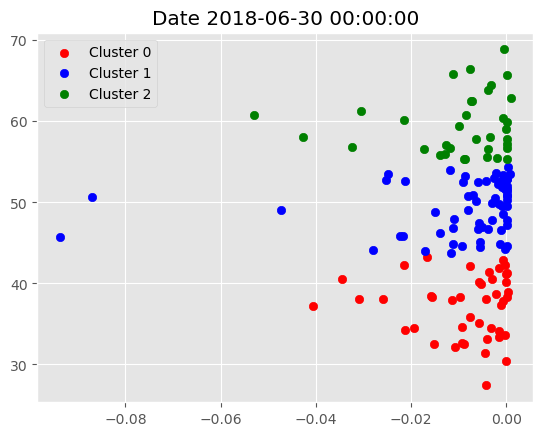

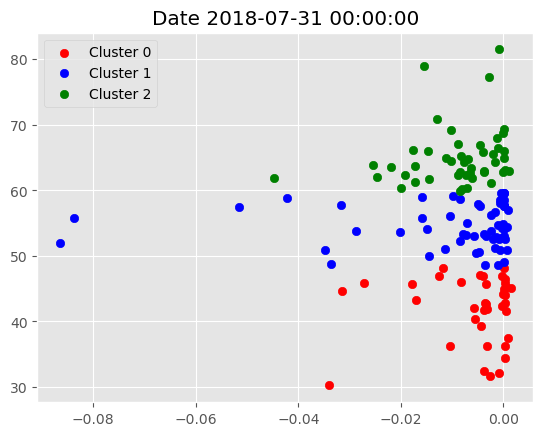

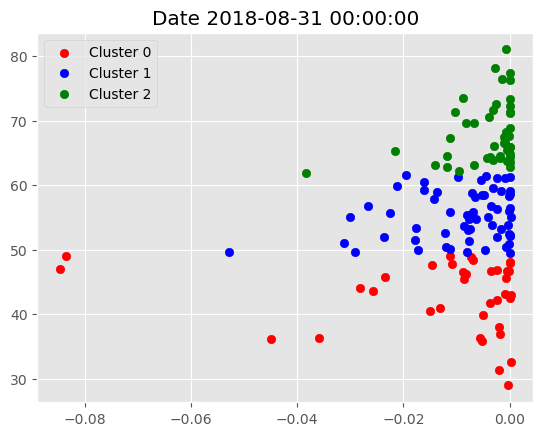

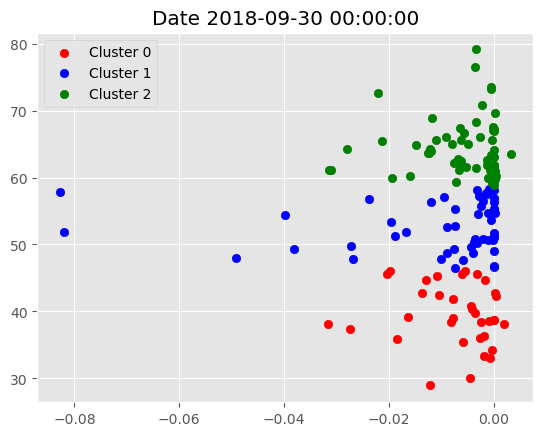

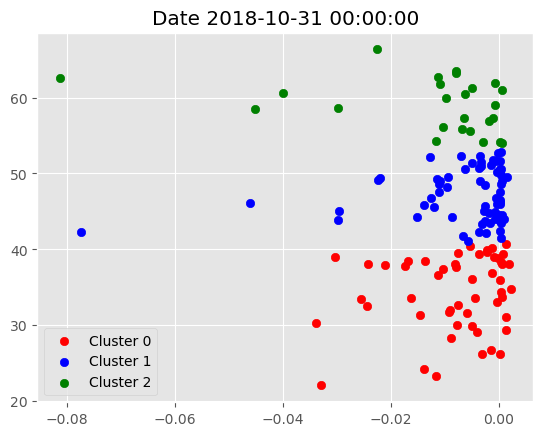

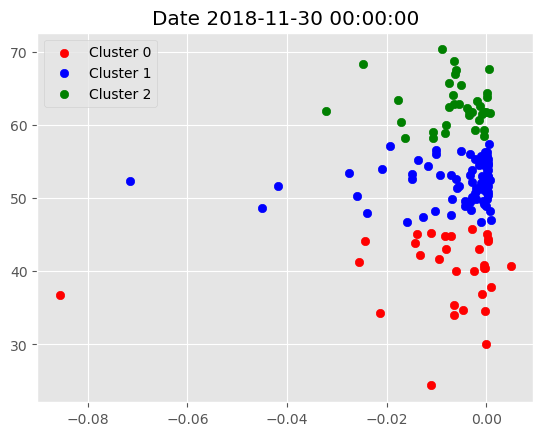

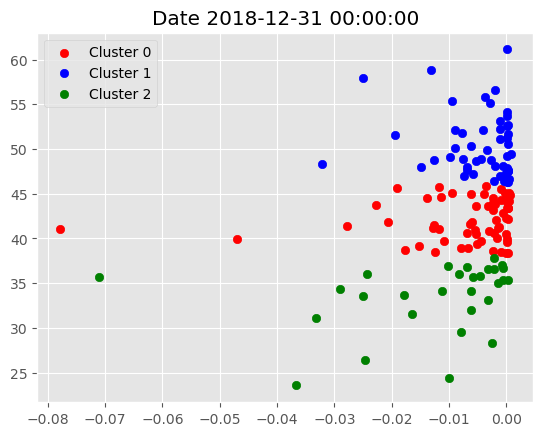

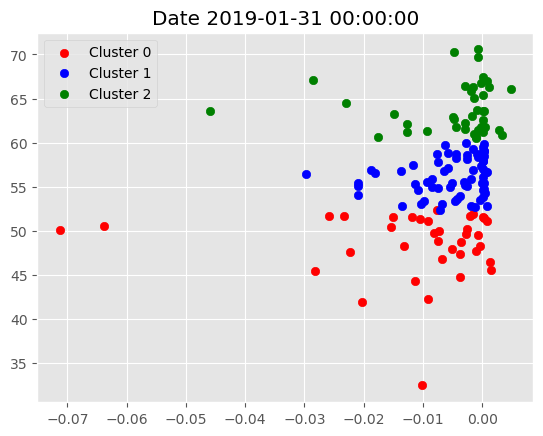

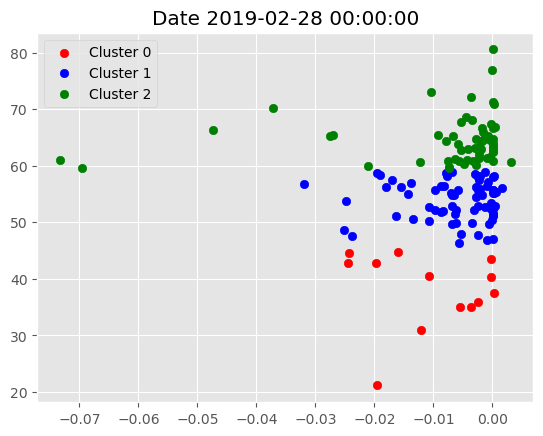

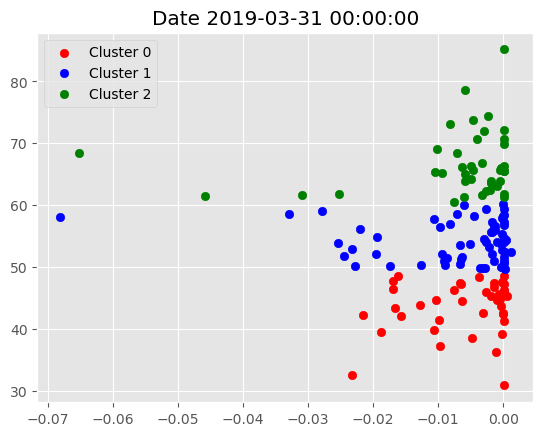

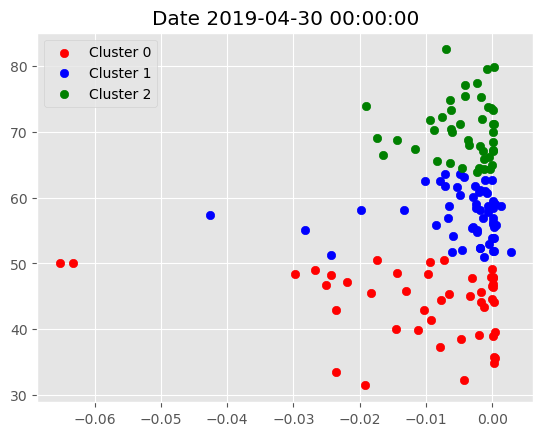

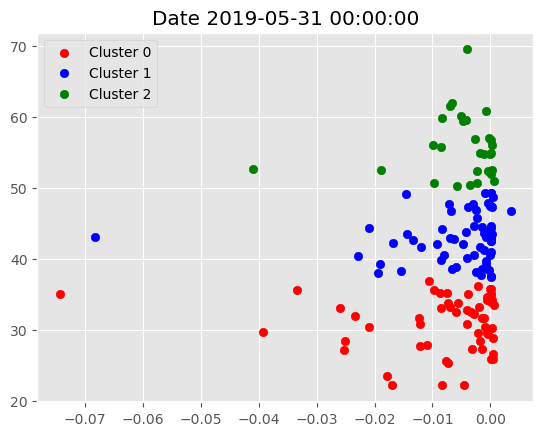

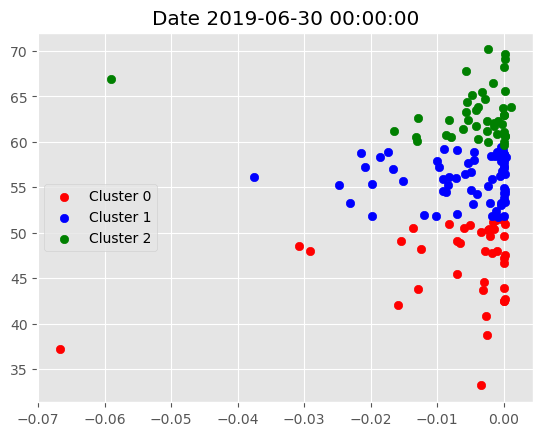

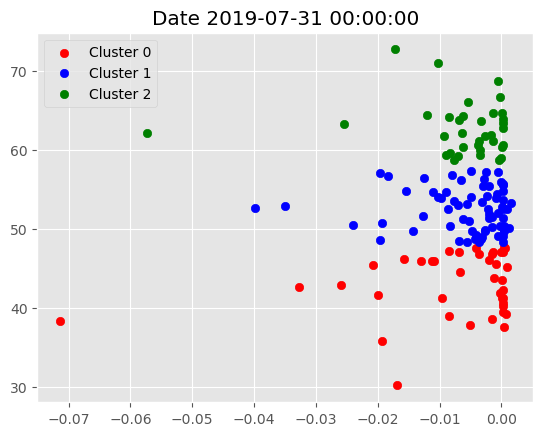

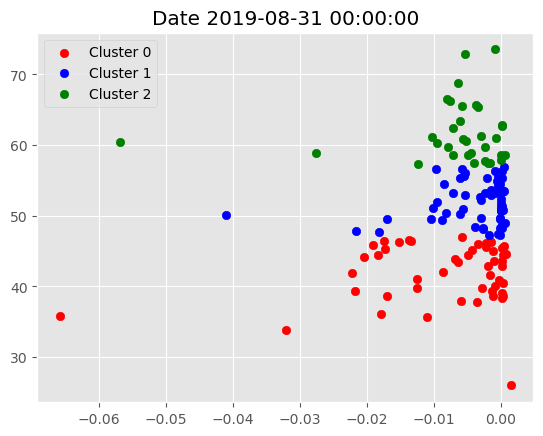

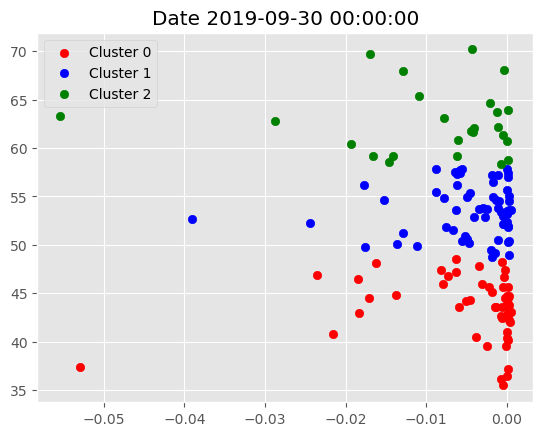

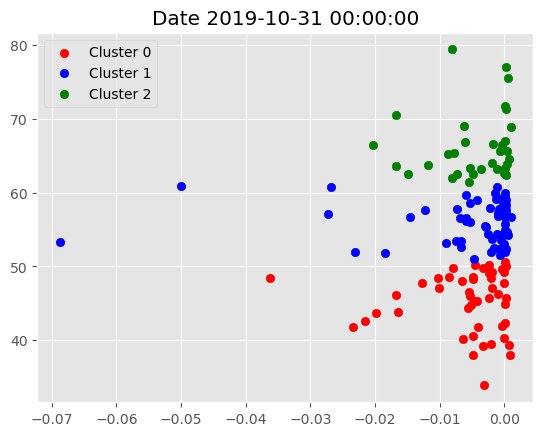

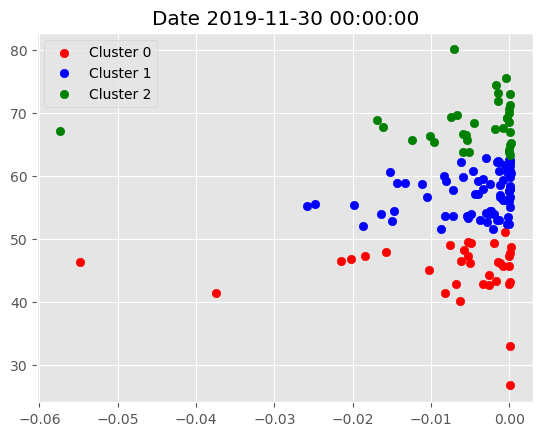

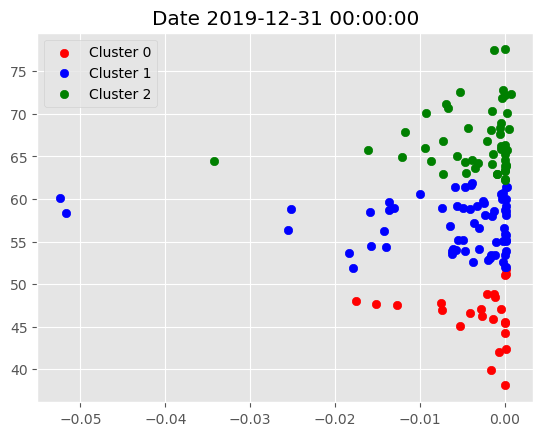

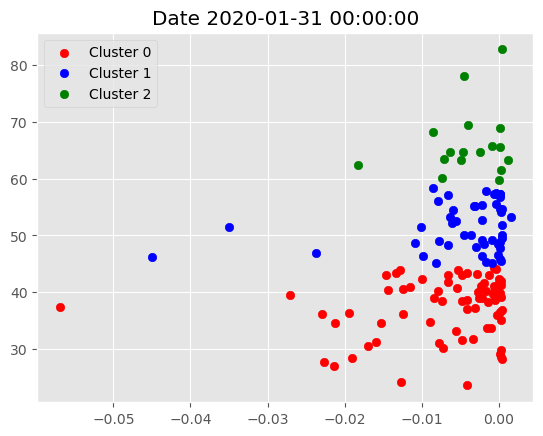

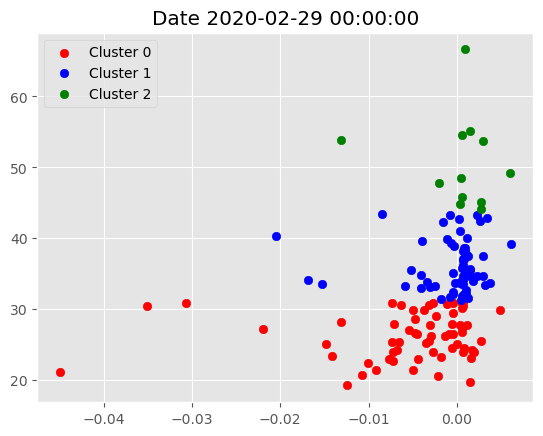

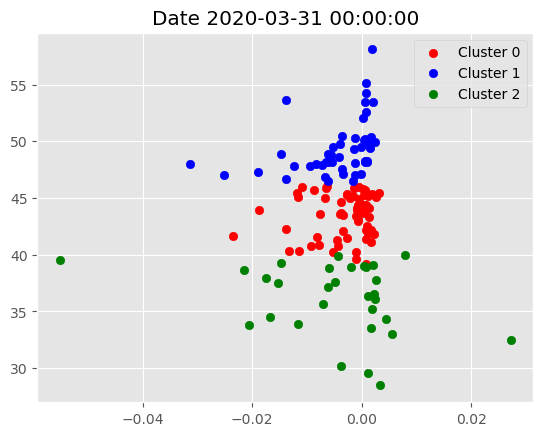

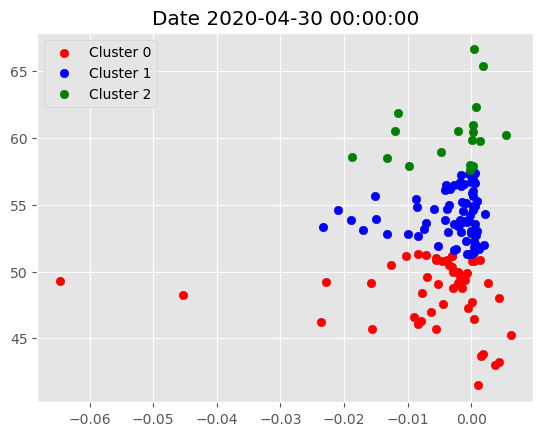

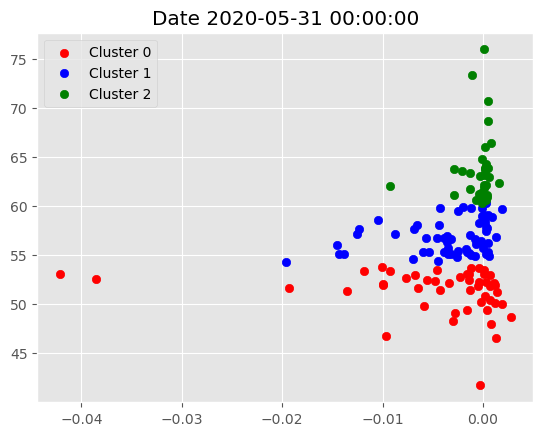

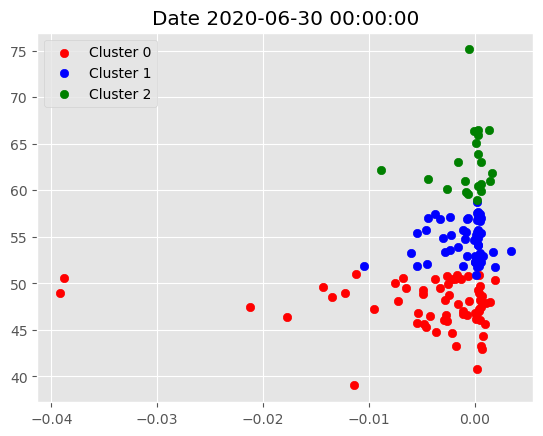

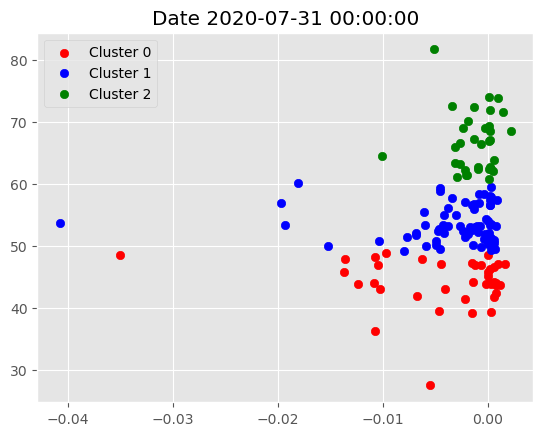

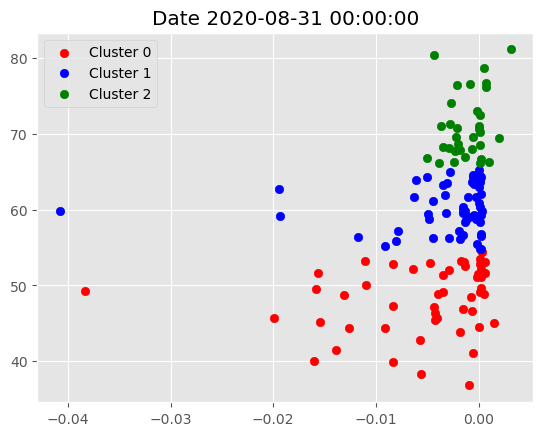

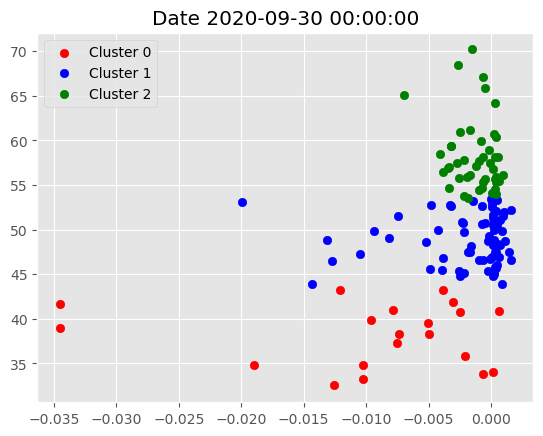

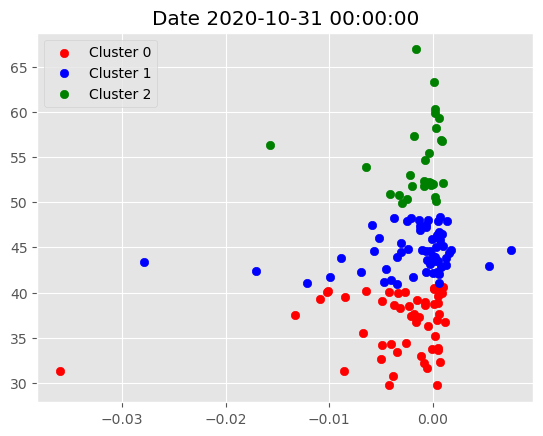

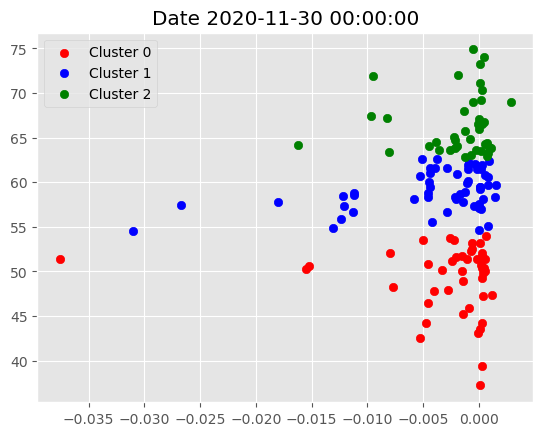

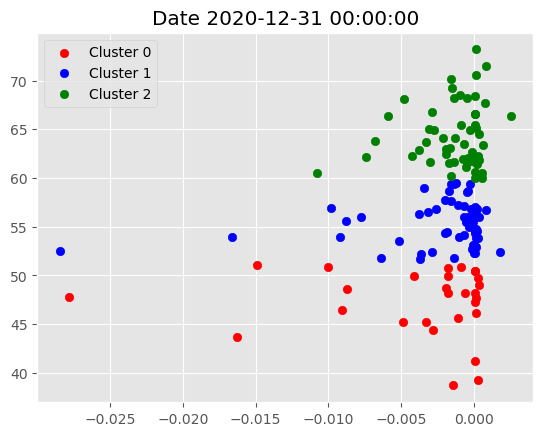

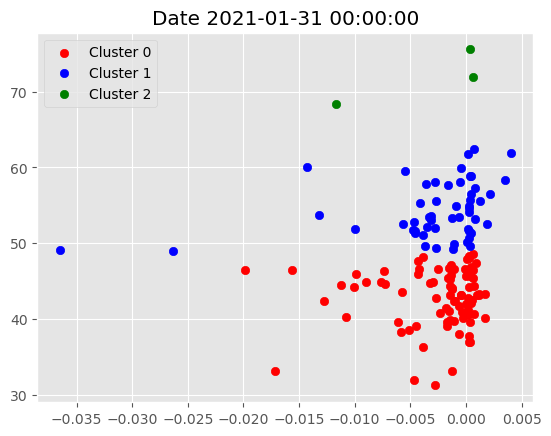

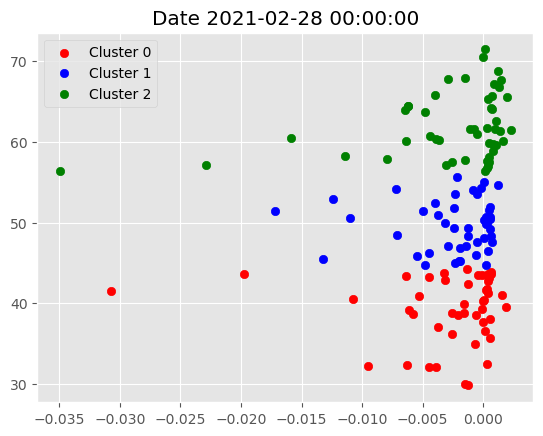

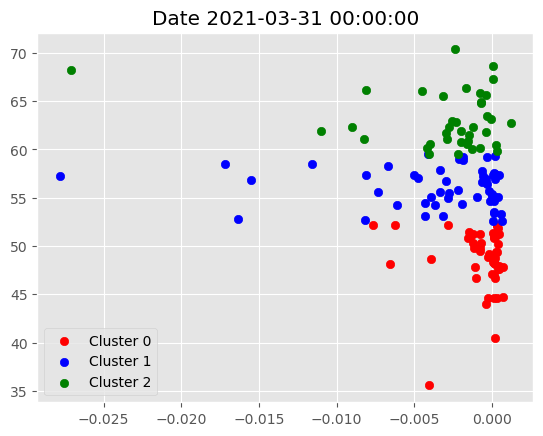

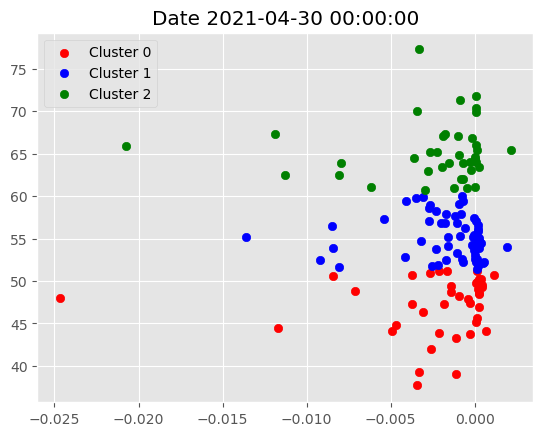

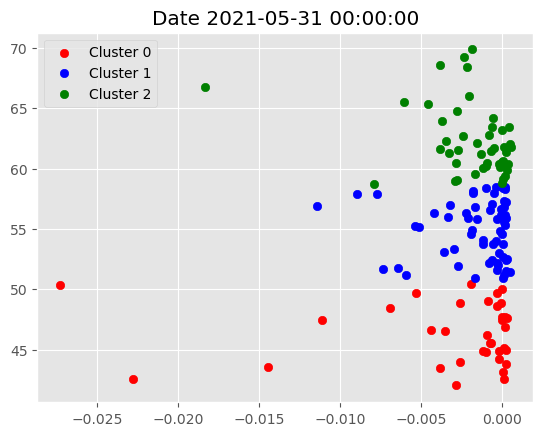

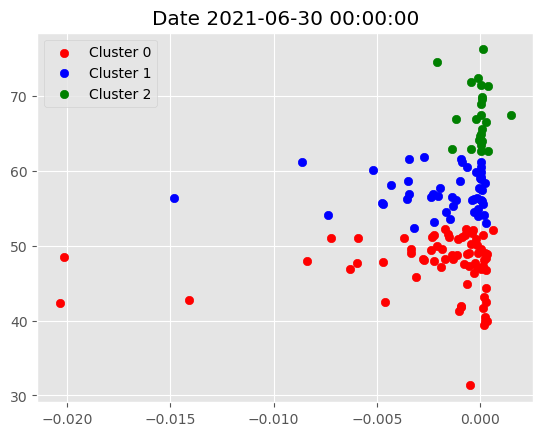

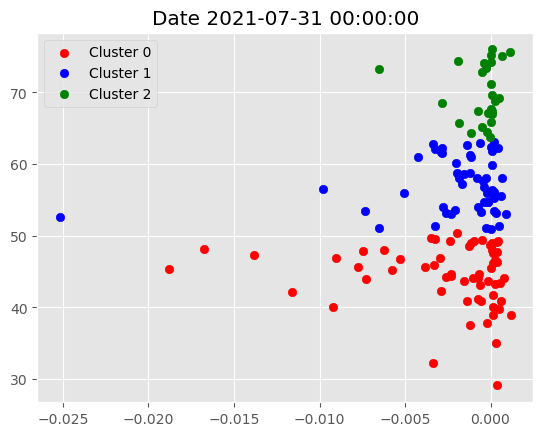

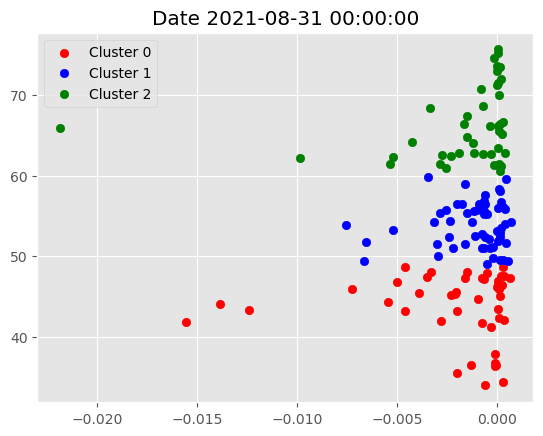

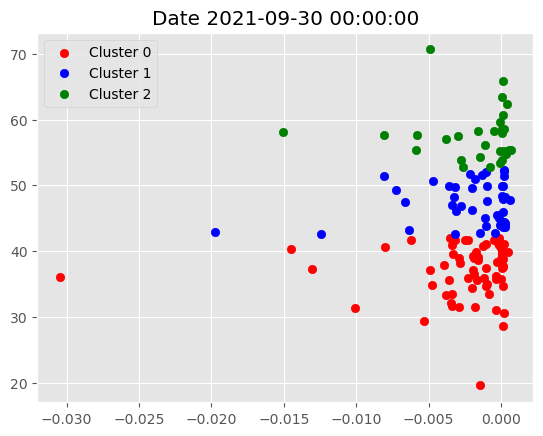

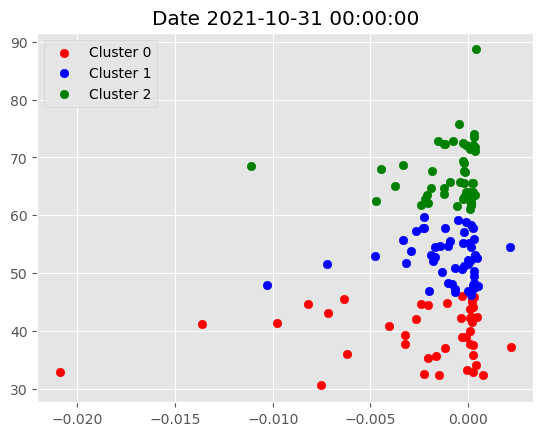

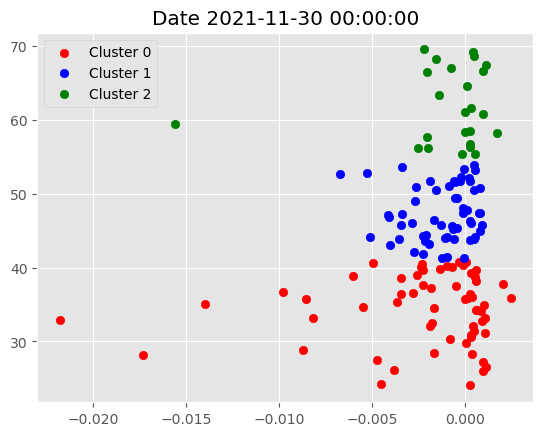

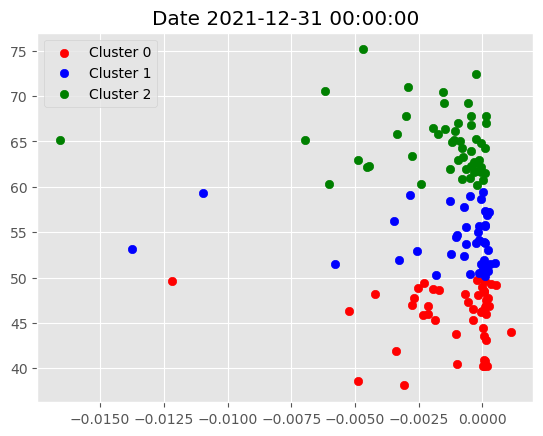

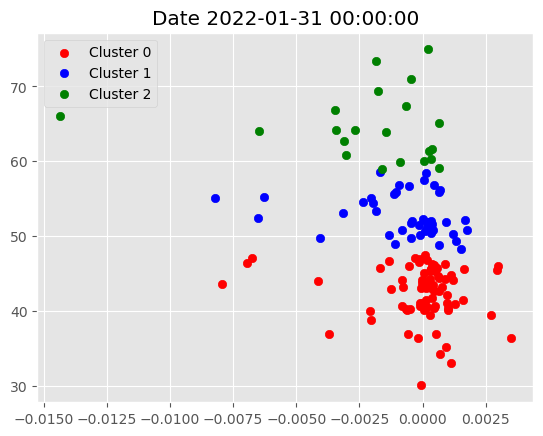

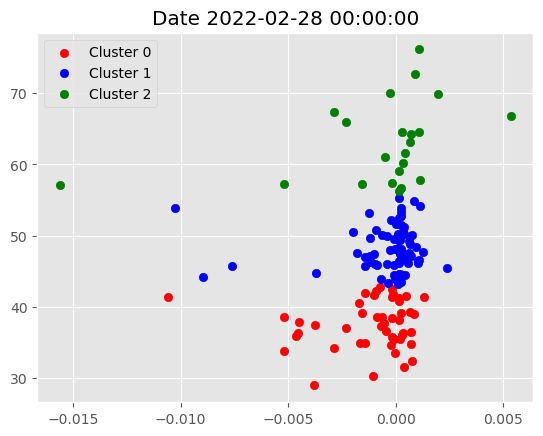

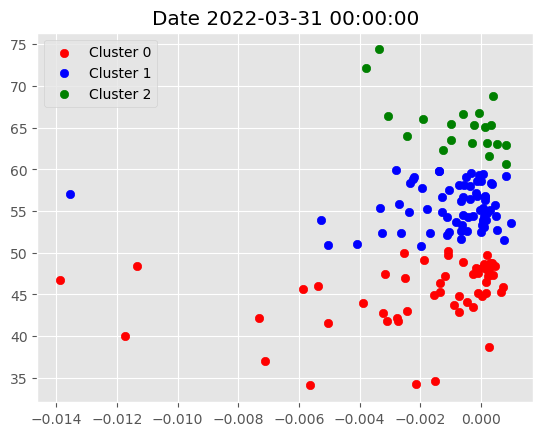

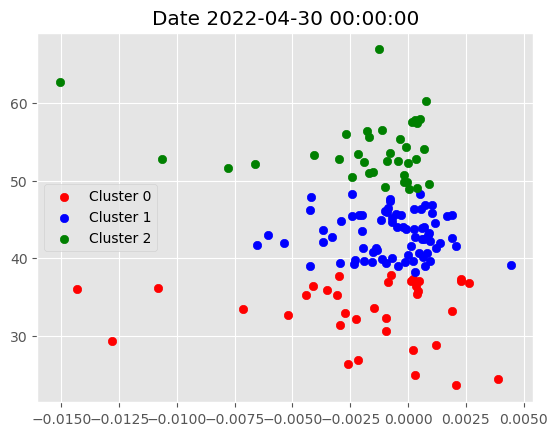

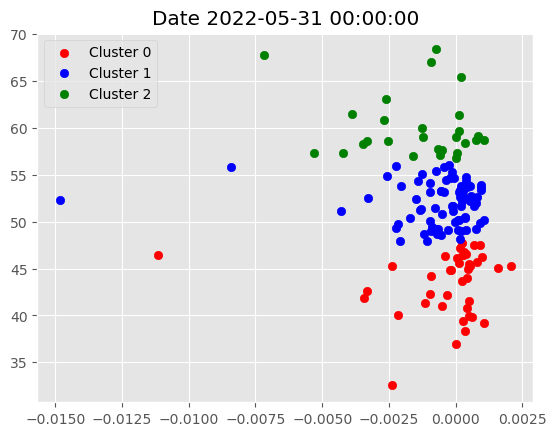

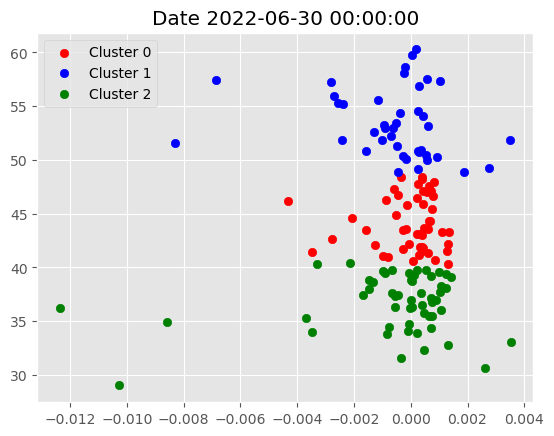

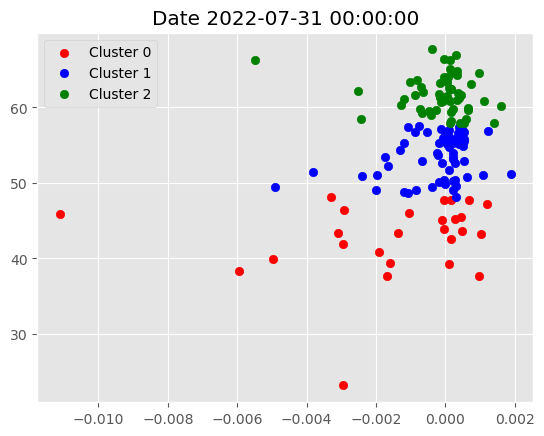

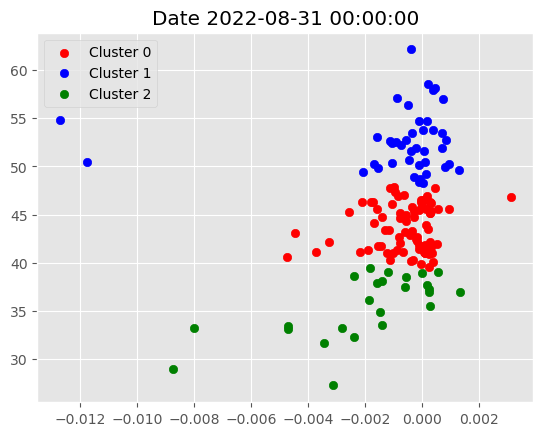

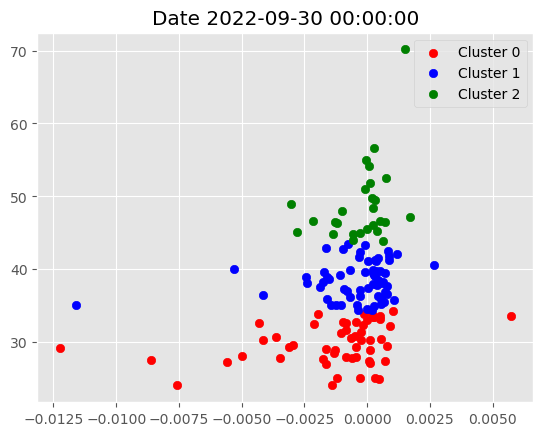

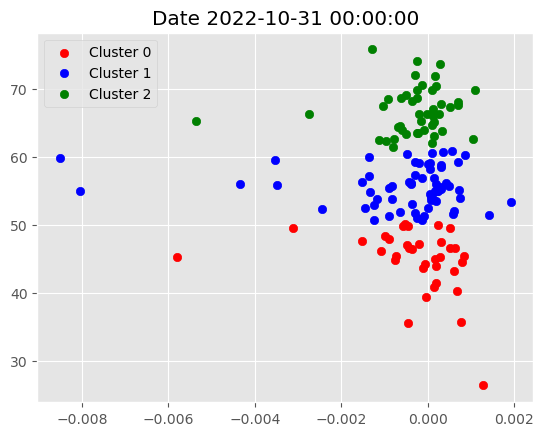

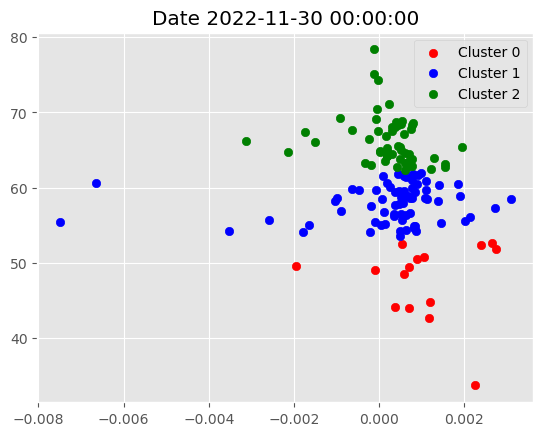

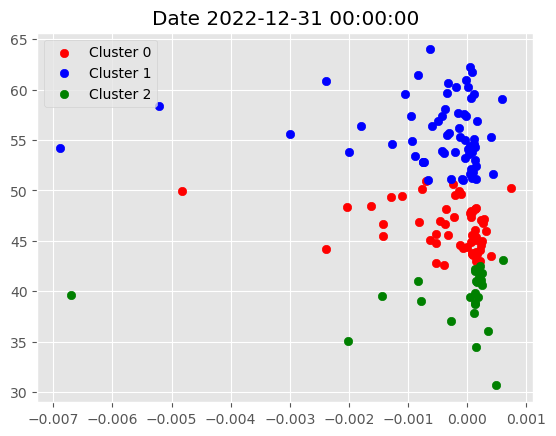

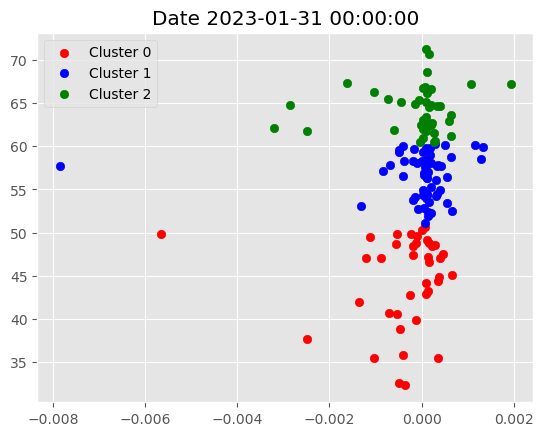

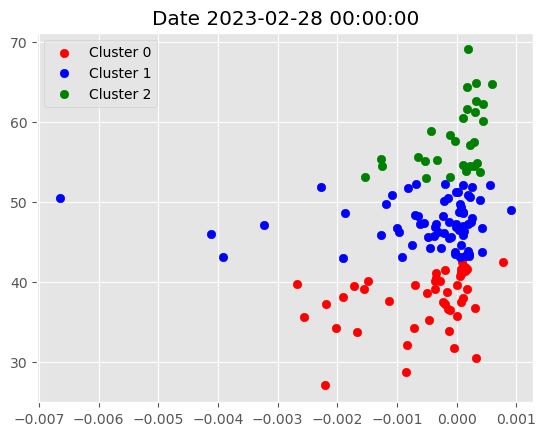

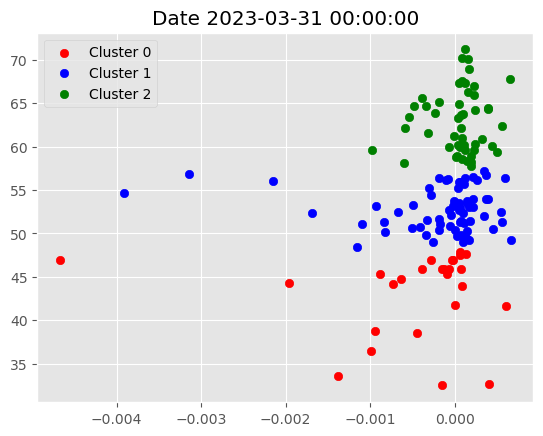

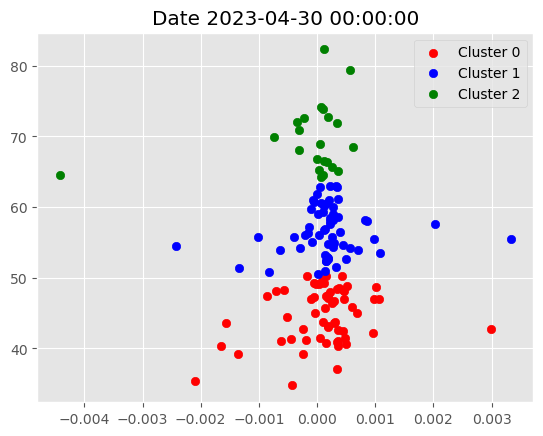

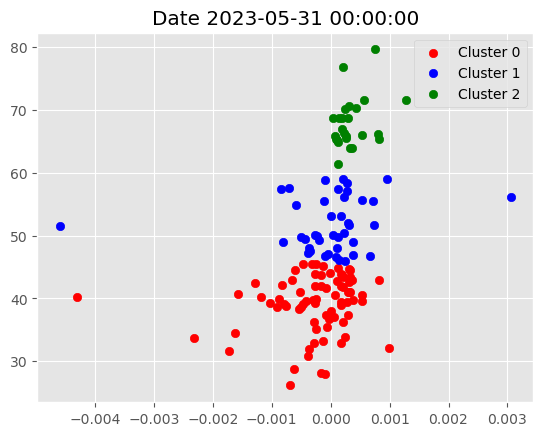

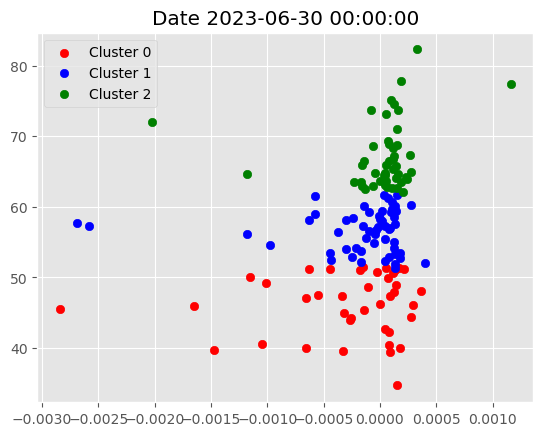

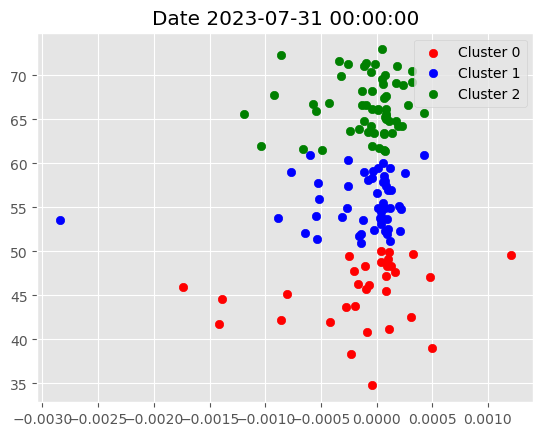

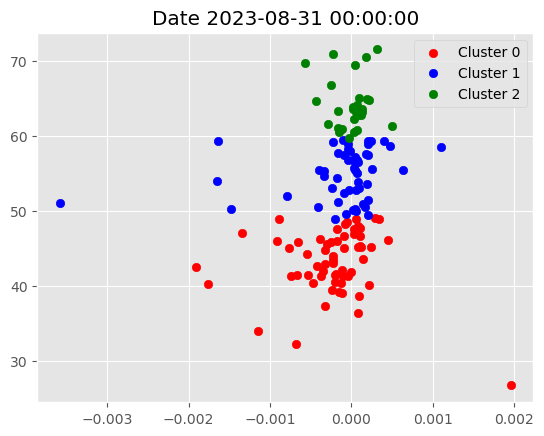

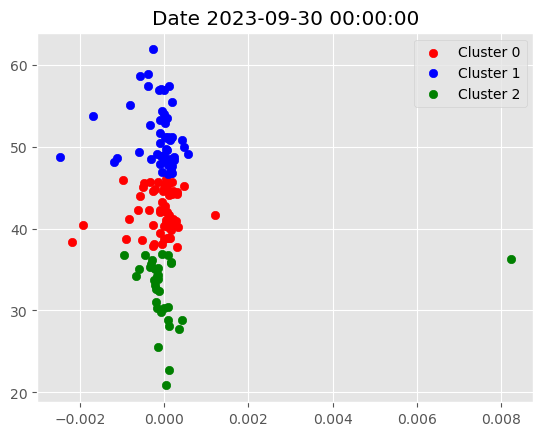

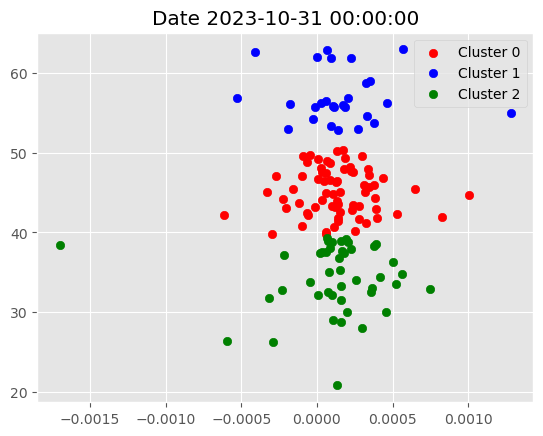

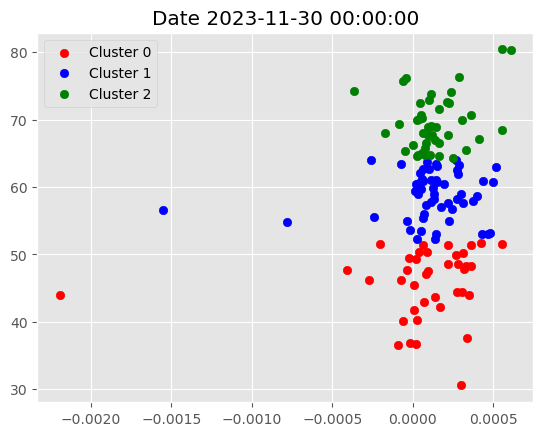

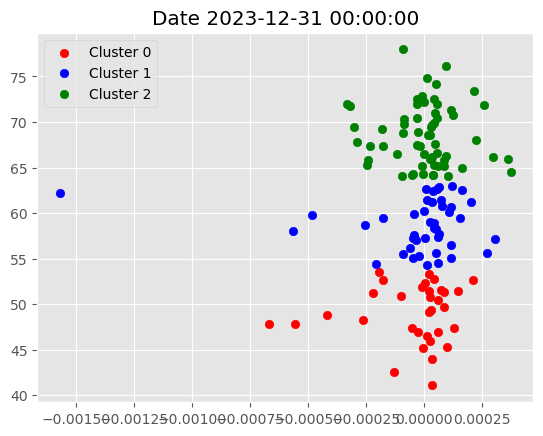

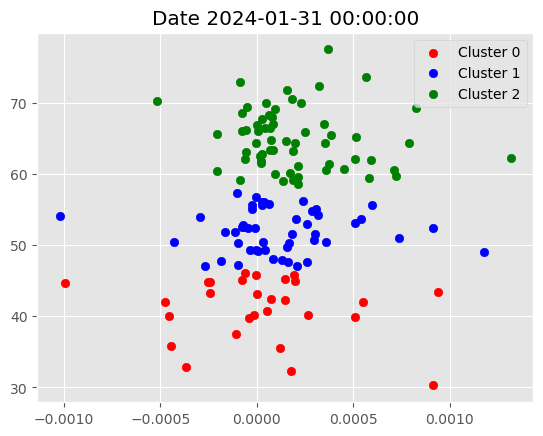

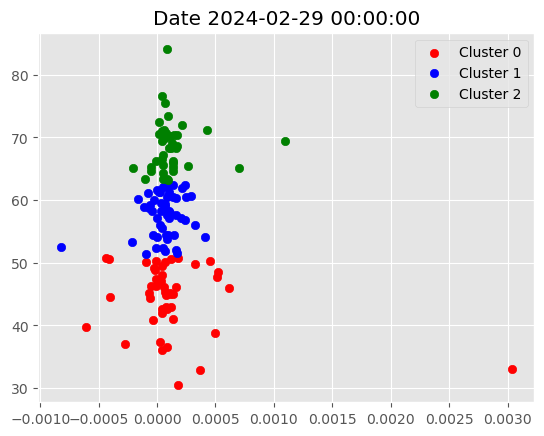

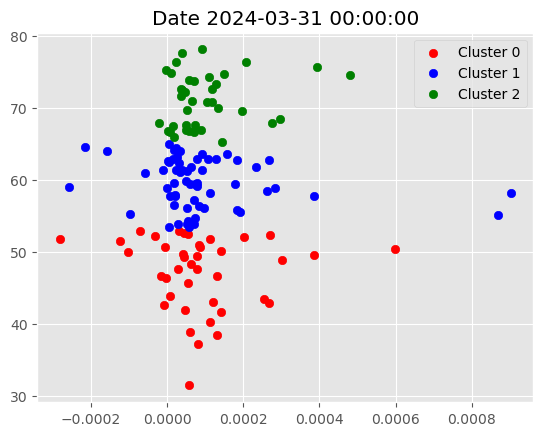

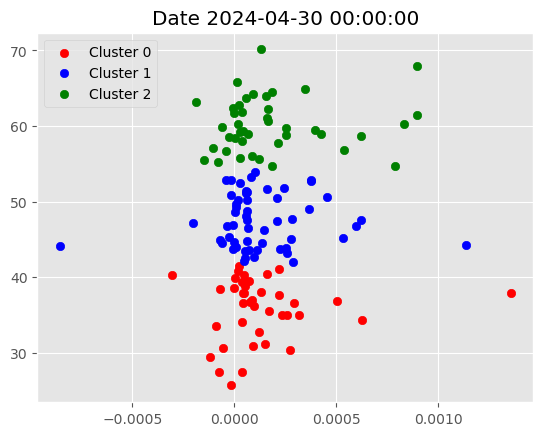

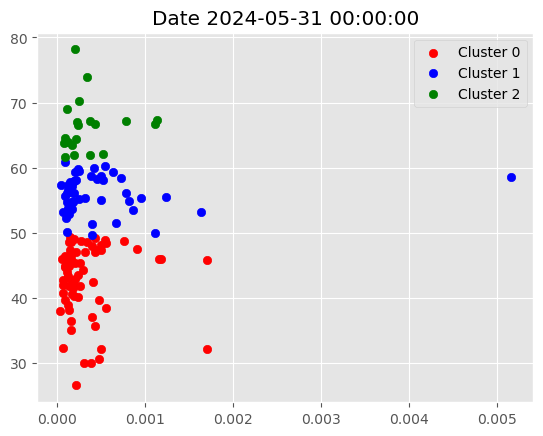

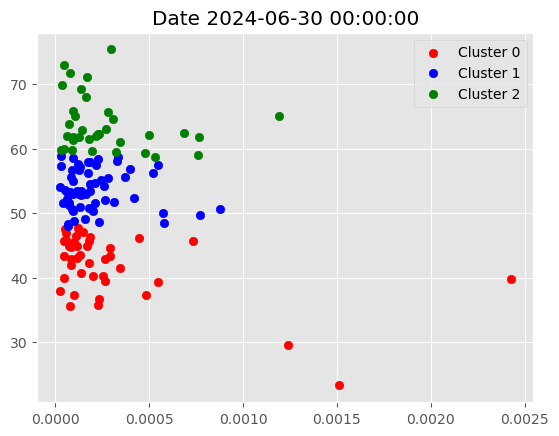

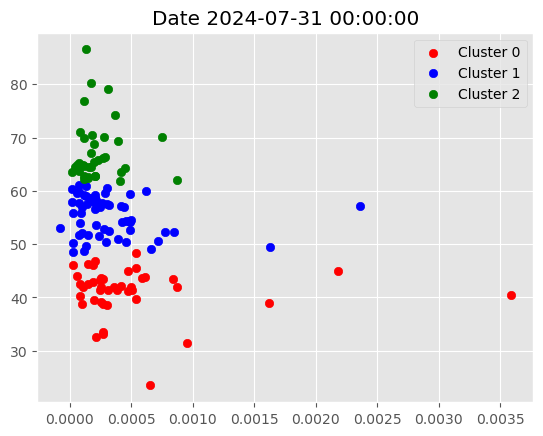

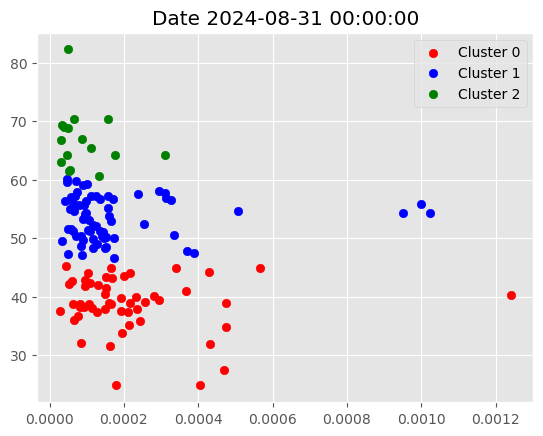

In [153]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    
    g = data.xs(i, level=0)
    
    plt.title(f'Date {i}')
    
    plot_clusters(g)

### 6.1 Pre defined Centroids

In [154]:
target_rsi = [45,55,75]
init_centroids = np.zeros((len(target_rsi), 18))
init_centroids[:,1] = target_rsi
init_centroids

array([[ 0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 75.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

## 7. For each month, build a portfolio on the basis of Efficient Frontier max Sharpe Ratio optimization

* We will only use stocks we choose from a specific cluster
* We would bank on RSI = 70 as it might outperform other stocks


In [155]:
data_new = data[data['cluster']==2].copy()

data_new = data_new.reset_index(level=1)

data_new.index = data_new.index+pd.DateOffset(1)

data_new = data_new.reset_index().set_index(['date', 'ticker'])

dates = data_new.index.get_level_values('date').unique().tolist()

fixed = {}

for date in dates:
    
    fixed[date.strftime('%Y-%m-%d')] = data_new.xs(date, level=0).index.tolist()
    
fixed

{'2016-09-01': ['ADBE',
  'AIG',
  'AMAT',
  'AVGO',
  'BAC',
  'BRK-B',
  'C',
  'CHTR',
  'COF',
  'CSCO',
  'EBAY',
  'GS',
  'INTC',
  'JPM',
  'META',
  'MPC',
  'MS',
  'MSFT',
  'MU',
  'QCOM',
  'SCHW',
  'SWKS',
  'UAL',
  'UNP',
  'USB',
  'WFC',
  'YUM'],
 '2016-10-01': ['ACN',
  'ADBE',
  'AMZN',
  'BKNG',
  'CAT',
  'CSX',
  'EA',
  'EBAY',
  'EOG',
  'FDX',
  'HPQ',
  'INTC',
  'KMI',
  'LVS',
  'MA',
  'MU',
  'NXPI',
  'PANW',
  'PARA',
  'QCOM',
  'UNP',
  'WDC'],
 '2016-11-01': ['AAL',
  'AIG',
  'AXP',
  'BA',
  'BAC',
  'BKNG',
  'C',
  'COF',
  'COP',
  'CSX',
  'CVX',
  'DAL',
  'DE',
  'EXPE',
  'FCX',
  'FDX',
  'GS',
  'JPM',
  'LMT',
  'LVS',
  'MA',
  'MDLZ',
  'MET',
  'META',
  'MO',
  'MPC',
  'MS',
  'MSFT',
  'NEE',
  'NFLX',
  'NXPI',
  'PANW',
  'PARA',
  'QCOM',
  'TXN',
  'UAL',
  'USB',
  'VLO',
  'WBA',
  'WDC'],
 '2016-12-01': ['AAL',
  'AMAT',
  'AXP',
  'BA',
  'BAC',
  'BRK-B',
  'C',
  'CAT',
  'CMCSA',
  'COF',
  'COP',
  'CSX',
  'CVX',
  'D

## 8. Define portfolio optimization function

* We will use PyPortfolioOpt package and EfficientFrontier to maximize Sharpe Ratio
* We will use prices for the last 1 year to optimize the weights
* Apply single stock weight bounds constraint for diversification (ie min half of equally weoght and max 10% of portfolio)

In [164]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):
    
    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)
    
    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')
    
    weights = ef.max_sharpe()
    
    return ef.clean_weights()

### 8.1 Download fresh daily prices for shortlisted stocks

In [165]:
stocks = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])

new_df

[*********************100%%**********************]  169 of 169 completed


Price       Adj Close                                                  \
Ticker            AAL        AAPL        ABBV         ABT         ACN   
Date                                                                    
2015-08-31  37.170906   25.487455   42.565247   38.183521   81.099396   
2015-09-01  37.380699   24.348251   41.262585   36.733395   79.396057   
2015-09-02  39.583477   25.392525   41.589951   37.298267   81.237076   
2015-09-03  38.992256   24.947243   41.999172   37.213963   82.252205   
2015-09-04  38.715717   24.698605   40.764702   36.311863   81.254265   
...               ...         ...         ...         ...         ...   
2024-08-05   9.280000  209.270004  184.360001  108.629997  313.739990   
2024-08-06   9.310000  207.229996  185.710007  109.500000  318.679993   
2024-08-07   9.260000  209.820007  187.509995  109.940002  318.019989   
2024-08-08   9.890000  213.309998  190.399994  109.760002  315.880005   
2024-08-09   9.860000  216.240005  189.929993  108.709999  315.829987   

Price                                                                  ...  \
Ticker            ADBE         ADI         ADP        ADSK        AIG  ...   
Date                                                                   ...   
2015-08-31   78.570000   46.671597   63.589130   46.750000  48.058491  ...   
2015-09-01   75.989998   44.741558   61.763340   45.490002  46.776203  ...   
2015-09-02   77.250000   45.610500   63.399956   45.990002  47.070881  ...   
2015-09-03   78.320000   46.095089   63.778271   45.939999  47.349648  ...   
2015-09-04   76.889999   45.084133   62.626896   45.369999  46.258503  ...   
...                ...         ...         ...         ...        ...  ...   
2024-08-05  509.320007  200.559998  258.140015  225.720001  70.160004  ...   
2024-08-06  514.200012  204.880005  259.470001  234.229996  71.239998  ...   
2024-08-07  513.619995  201.309998  258.910004  232.570007  70.580002  ...   
2024-08-08  530.239990  213.639999  262.790009  239.289993  72.139999  ...   
2024-08-09  536.299988  211.309998  262.179993  240.440002  72.059998  ...   

Price        Volume                                                    \
Ticker         VRTX      VTRS        VZ       WBA       WDC       WFC   
Date                                                                    
2015-08-31  1711100   5784900  14785800   3530700   1911300  13842200   
2015-09-01  1998500   6601900  21096300   7100900   3070200  28031700   
2015-09-02  1486900   6139700  17197600   5053200   2520900  20919600   
2015-09-03  1010200   6766800  12480800   4024200   2032400  15719000   
2015-09-04  1240700   6034800  16045100   5468900   1671900  22303800   
...             ...       ...       ...       ...       ...       ...   
2024-08-05  2231400   8168600  26855000  22610400  10891300  28594000   
2024-08-06  1626400   7895000  18104200  13152200   9543700  18723500   
2024-08-07  1650000  11623800  12176300  14128700   8197500  18407500   
2024-08-08  1545100  17115800  13237100  10187100   6067000  16176000   
2024-08-09   791700   8300200  11816600   9662700   5335000  11665500   

Price                                             
Ticker           WMT     WYNN       XOM      YUM  
Date                                              
2015-08-31  24525600  2863000  19570100  4483749  
2015-09-01  40181700  3907800  24092900  6239748  
2015-09-02  28543800  4612300  16936900  4645105  
2015-09-03  25571400  2928000  13451900  2528421  
2015-09-04  27697200  3084900  14902500  2951007  
...              ...      ...       ...      ...  
2024-08-05  20770500  4677800  18025900  3665000  
2024-08-06  14815100  5052100  13647800  2981100  
2024-08-07  18499200  5081700  13660700  3071000  
2024-08-08  12489800  2654800  13851000  1355100  
2024-08-09  13800400  2416200  12145700  1446300  

[2251 rows x 1014 columns]

* Calculate daily returns for each stock in the portfolio
* Loop over each month, select stocks and calculate weight for next month
* If the maximum sharpe ratio optimization fails for a given month, apply weights equally
* Calculate return

In [166]:
returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed.keys():
    
    try:

        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
        cols = fixed[start_date]
        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')
        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]
        
        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                   lower_bound=round(1/(len(optimization_df.columns)*2),3))
            weights = pd.DataFrame(weights, index=pd.Series(0))
            success = True

        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
            
        if success==False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                     index=optimization_df.columns.tolist(),
                                     columns=pd.Series(0)).T
        
        temp_df = returns_dataframe[start_date:end_date]
        temp_df = temp_df.stack().to_frame('return').reset_index(level=0).merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                                                              left_index=True,
                                                              right_index=True).reset_index().set_index(['Date','Ticker']).unstack().stack()

        temp_df.index.names = ['date', 'ticker']
        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']
        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')
        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()
portfolio_df

Max Sharpe Optimization failed for 2018-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2019-01-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-09-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2023-01-01, Continuing with Equal-Weights
'return'


,Strategy Return
date,
2016-09-01,0.006016
2016-09-02,0.000184
2016-09-06,0.001889
2016-09-07,0.000604
2016-09-08,-0.004351
...,...
2024-08-05,-0.025548
2024-08-06,0.008240
2024-08-07,-0.010534


<Axes: xlabel='date'>

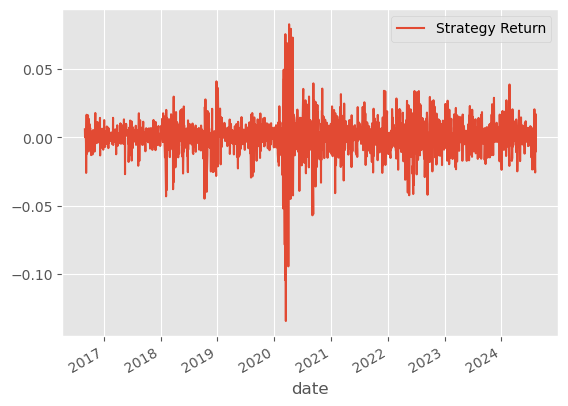

In [167]:
portfolio_df.plot()

## 9. Visualize the returns and compare to S&P 500

In [168]:
import datetime as dt
spy = yf.download('SPY',start= '2016-01-01', end=dt.date.today())

spy_returns = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'}, axis=1)
portfolio_df = portfolio_df.join(spy_returns, how='inner')

[*********************100%%**********************]  1 of 1 completed


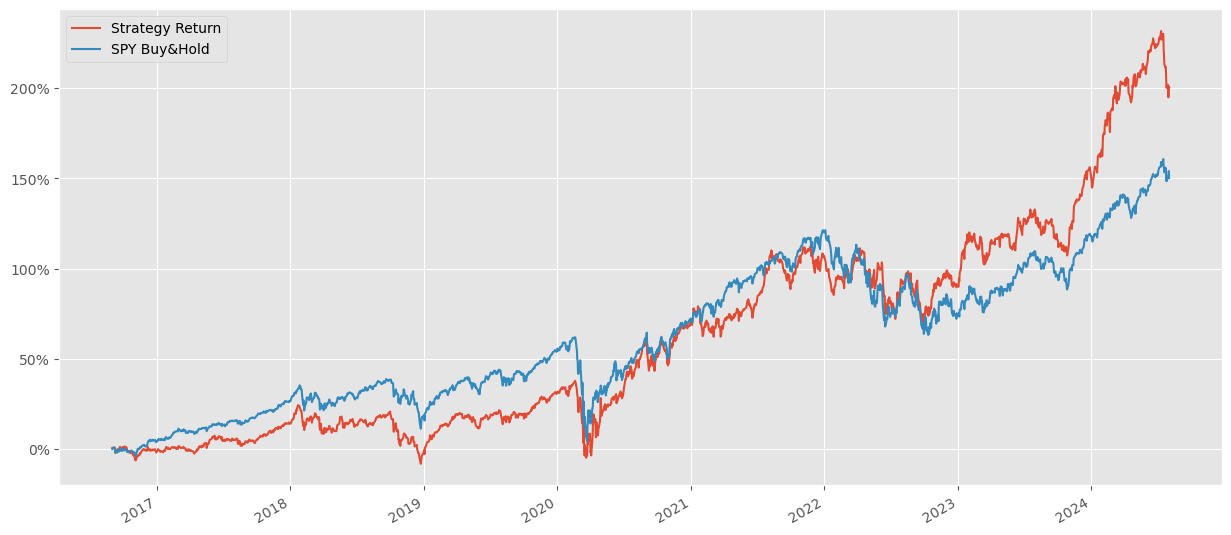

In [169]:
plt.style.use('ggplot')

portfolio_return = np.exp(np.log1p(portfolio_df).cumsum())-1
portfolio_return[:'2024-08-01'].plot(figsize=(15,7))

# Y-axis to percentage
import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))